# My Linear Regression Project

In [1]:
import my_functions
from my_functions import *

### Data preparation

In [2]:
## Your code here (click on the window and type 'b' if you want to split in more than one code window)

# Step 1: Read data, report missing data

import pandas as pd #importing pandas
train = pd.read_csv('C:/Users/sssalas/OneDrive - Philippine Competition Commission/Desktop/project1/real-estate-valuation-with-linear-models/Regression_Supervised_Train.csv') 
#reading train dataset
test = pd.read_csv('C:/Users/sssalas/OneDrive - Philippine Competition Commission/Desktop/project1/real-estate-valuation-with-linear-models/Regression_Supervised_Test.csv')  
#reading test dataset

datasets = [train, test]

for i in datasets:
    print(i.shape)
# there are two more columns in the train dataset, 'parcelvalue' and 'mypointer'

(24755, 48)
(2746, 46)


In [3]:
# Make a copy of data for later use
train_original=train.copy()
test_original=test.copy()

In [4]:
to_drop = ['totaltaxvalue', 'buildvalue', 'landvalue', 'mypointer']

In [5]:
#dropping the columns suggested to be deleted in the instructions to avoid high correlation
train = train.drop(to_drop, axis=1)

test = test.drop(to_drop[:3], axis=1)
#because we dropped these value columns, it would be quite difficult to get a low mean square error

In [6]:
datasets = [train, test]

for i in datasets:
    print(i.shape)
# now, the two datasets only differ in features in terms of parcel value

(24755, 44)
(2746, 43)


In [7]:
# counting observations per feature in the train and test dataset with null values
for i in datasets:
    print(i.isnull().sum())

lotid                     0
logerror              22992
transactiondate       22992
aircond               10291
style                 24522
basement              24699
numbath                   0
numbedroom                0
classbuild            24737
qualitybuild          10101
decktype              24043
finishedarea1st       18612
finishedarea             63
perimeterarea         24755
totalarea             24693
finishedareaEntry     18612
countycode                0
numfireplace              0
numfullbath              36
garagenum             14761
garagearea            14761
tubflag               23510
heatingtype            8966
latitude                  0
longitude                 0
lotarea                 709
poolnum               12034
poolarea              23549
citycode                 31
countycode2               0
neighborhoodcode       9728
regioncode                2
roomnum                   0
storytype             24699
num34bath             19736
material            

In [8]:
# Step 2: Remove features with missing data, and then observations with missing data
train = train.dropna(axis=1, thresh=round(0.60*len(train.index)))
#any feature with  more than 40% missing values will be removed. in other words, we keep only the columns whose 60% of the values are not NaNs

train.shape #checking the dimensions, now we only have 19 features as opposed to 44 before. the number of our observations is 24755.

(24755, 19)

In [9]:
train_columns = train.columns #we store the column names that have been left in the train dataset. this will be our index for the columns that we will retain for the test dataset
train_columns = train_columns.drop(["parcelvalue"])

In [10]:
test = test[train_columns]
# now, we only retain columns in the test dataset that are present in the train dataset as well

In [11]:
test.shape
# we confirm that there are only 18 features left in our test dataset. the train dataset still has more than 1 column (parcelvalue)

(2746, 18)

In [12]:
datasets = [train, test]

for i in datasets:
    print(i.isnull().sum())

lotid                  0
numbath                0
numbedroom             0
finishedarea          63
countycode             0
numfireplace           0
numfullbath           36
heatingtype         8966
latitude               0
longitude              0
lotarea              709
citycode              31
countycode2            0
neighborhoodcode    9728
regioncode             2
roomnum                0
year                  12
parcelvalue            0
taxyear                0
dtype: int64
lotid               0
numbath             0
numbedroom          0
finishedarea        0
countycode          0
numfireplace        0
numfullbath         0
heatingtype         0
latitude            0
longitude           0
lotarea             0
citycode            0
countycode2         0
neighborhoodcode    0
regioncode          0
roomnum             0
year                0
taxyear             0
dtype: int64


In [13]:
display(train) #we notice that there are still observations in train that have missing values

,lotid,numbath,numbedroom,finishedarea,countycode,numfireplace,numfullbath,heatingtype,latitude,longitude,lotarea,citycode,countycode2,neighborhoodcode,regioncode,roomnum,year,parcelvalue,taxyear
0,17214744,2.0,3,1255.0,6111,1,2.0,NaN,34191029,-118914689,12497.0,34278.0,2061,46736.0,96351.0,6,1979.0,142212.0,2015
1,12018724,2.0,1,1033.0,6037,0,2.0,2.0,34092200,-118374000,20527.0,48424.0,3101,NaN,96050.0,0,1973.0,301141.0,2015
2,11306699,3.0,4,2982.0,6037,0,3.0,2.0,34696444,-118184228,8466.0,5534.0,3101,NaN,97319.0,0,2004.0,235062.0,2015
3,11047729,2.0,3,1757.0,6037,0,2.0,2.0,34252019,-118467570,8612.0,12447.0,3101,116646.0,96371.0,0,1952.0,270543.0,2015
4,17174848,3.0,2,1951.0,6111,0,3.0,NaN,34146639,-119190425,2660.0,47198.0,2061,NaN,97109.0,6,1988.0,300886.0,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24750,11633053,3.0,2,1382.0,6037,0,3.0,2.0,34084400,-118379000,17166.0,48424.0,3101,762180.0,96050.0,0,1982.0,786817.0,2016
24751,10751511,2.0,2,1127.0,6037,0,2.0,2.0,34134687,-118725713,289439.0,9840.0,3101,764088.0,96336.0,0,1973.0,282464.0,2015
24752,10719915,2.0,4,2179.0,6037,0,2.0,2.0,34206172,-118614583,8150.0,12447.0,3101,30731.0,96342.0,0,1962.0,419389.0,2016
24753,11639212,5.0,5,3807.0,6037,0,5.0,2.0,34071872,-118409758,12725.0,10389.0,3101,NaN,96086.0,0,1923.0,3437492.0,2015


In [14]:
train = train.dropna() #we drop observations that have missing values in the train dataset, 
#not necessary to put axis=0 because that is the default

train.shape #now the dimensions of our train dataset is (12560, 19). The number of our observations is 12560. This is about half of the number of observations before.

(12560, 19)

In [15]:
display(train)

,lotid,numbath,numbedroom,finishedarea,countycode,numfireplace,numfullbath,heatingtype,latitude,longitude,lotarea,citycode,countycode2,neighborhoodcode,regioncode,roomnum,year,parcelvalue,taxyear
3,11047729,2.0,3,1757.0,6037,0,2.0,2.0,34252019,-118467570,8612.0,12447.0,3101,116646.0,96371.0,0,1952.0,270543.0,2015
6,11016338,3.0,3,1663.0,6037,0,3.0,2.0,34284508,-118493574,12102.0,12447.0,3101,31817.0,96370.0,0,1961.0,363524.0,2016
8,11671803,3.0,3,1777.0,6037,0,3.0,2.0,34076404,-118560997,363116.0,12447.0,3101,19810.0,96120.0,0,1978.0,329781.0,2015
9,11150386,3.0,4,2198.0,6037,0,3.0,2.0,34398126,-118448101,5815.0,54311.0,3101,37739.0,96401.0,0,2000.0,360647.0,2015
13,10965295,3.0,3,1231.0,6037,0,3.0,2.0,34315800,-118443000,140609.0,12447.0,3101,34213.0,96368.0,0,1989.0,186549.0,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24747,11692375,5.0,4,4611.0,6037,0,5.0,2.0,34104857,-118484435,341421.0,12447.0,3101,113910.0,96030.0,0,1990.0,2251206.0,2015
24748,12026030,3.0,3,3340.0,6037,0,3.0,2.0,34113968,-118362226,8847.0,12447.0,3101,274049.0,96027.0,0,1975.0,920386.0,2016
24750,11633053,3.0,2,1382.0,6037,0,3.0,2.0,34084400,-118379000,17166.0,48424.0,3101,762180.0,96050.0,0,1982.0,786817.0,2016
24751,10751511,2.0,2,1127.0,6037,0,2.0,2.0,34134687,-118725713,289439.0,9840.0,3101,764088.0,96336.0,0,1973.0,282464.0,2015


In [16]:
test = test.dropna() #we drop observations that have missing values in the train dataset


test.shape #now the dimensions of our train dataset is (2746, 18).
# we still are left with the same number of obs and columns because there are no missing values in the rows of the train dataset

(2746, 18)

In [17]:
display(test)

,lotid,numbath,numbedroom,finishedarea,countycode,numfireplace,numfullbath,heatingtype,latitude,longitude,lotarea,citycode,countycode2,neighborhoodcode,regioncode,roomnum,year,taxyear
0,11614222,3.0,3,1618.0,6037,0,3.0,2.0,34048500,-118438000,19423.0,12447.0,3101,118887.0,96006,0,1975.0,2015
1,11555888,2.0,3,1817.0,6037,0,2.0,2.0,34023816,-118429617,7625.0,12447.0,3101,116415.0,96047,0,1948.0,2015
2,13052987,2.0,3,1549.0,6037,0,2.0,2.0,34125379,-117707983,11080.0,30908.0,3101,764142.0,96469,0,1978.0,2016
3,12448473,3.0,3,1275.0,6037,0,3.0,2.0,33878735,-118171388,58881.0,46298.0,3101,276476.0,96239,0,1991.0,2015
4,12559155,1.0,1,600.0,6037,0,1.0,2.0,33766300,-118188000,47343.0,46298.0,3101,273486.0,96236,0,2004.0,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2741,10991930,1.0,1,672.0,6037,0,1.0,7.0,34276978,-118342702,447679.0,12447.0,3101,268249.0,96368,0,1946.0,2015
2742,11103888,1.0,4,1140.0,6037,0,1.0,2.0,34424797,-118472198,6224.0,54311.0,3101,37739.0,96374,0,1962.0,2015
2743,11614730,3.0,2,1368.0,6037,0,3.0,2.0,34046900,-118440000,6614.0,12447.0,3101,118887.0,96006,0,1981.0,2015
2744,10910905,3.0,2,1506.0,6037,0,3.0,2.0,34144700,-118388000,280590.0,12447.0,3101,47880.0,96449,0,1973.0,2015


In [18]:
datasets = [train, test]

for i in datasets:
    print(i.isnull().sum())

# now, we can confirm that there are no more null values in our datasets

lotid               0
numbath             0
numbedroom          0
finishedarea        0
countycode          0
numfireplace        0
numfullbath         0
heatingtype         0
latitude            0
longitude           0
lotarea             0
citycode            0
countycode2         0
neighborhoodcode    0
regioncode          0
roomnum             0
year                0
parcelvalue         0
taxyear             0
dtype: int64
lotid               0
numbath             0
numbedroom          0
finishedarea        0
countycode          0
numfireplace        0
numfullbath         0
heatingtype         0
latitude            0
longitude           0
lotarea             0
citycode            0
countycode2         0
neighborhoodcode    0
regioncode          0
roomnum             0
year                0
taxyear             0
dtype: int64


In [19]:
#we notice that there are two countycodes, therefore we check if they are one and the same using corr. if there is perfect correlation, we drop one of them
corr_county = train['countycode'].corr(train['countycode2'])
print(corr_county) #corr_county = -1.0, therefore there is perfect correlation. 
#therefore we drop county2 in both datasets. note that this is only the purpose of this model. 
#it might be the case that the neighborhood codes hold other informations that are not just categorical (e.g. proximity)

#we also drop lotid because it has no cardinal or ordinal meaning 

-1.0


In [20]:
# we have also told to dropped the lotid because this name is arbitararily set and wouldn't help us with our pracelvalue predictions

train = train.drop(['countycode2', 'lotid'], axis=1) #now we only have 17 columns in train dataset
test = test.drop(['countycode2', 'lotid'], axis=1) #now we only have 16 columns in test dataset

In [21]:
train.describe() #we check some summary statistics of our train dataset
#at the same time we get a clear view of the columns that are left

,numbath,numbedroom,finishedarea,countycode,numfireplace,numfullbath,heatingtype,latitude,longitude,lotarea,citycode,neighborhoodcode,regioncode,roomnum,year,parcelvalue,taxyear
count,12560.000000,12560.000000,12560.000000,12560.000000,12560.000000,12560.00000,12560.000000,1.256000e+04,1.256000e+04,1.256000e+04,12560.000000,12560.000000,12560.000000,12560.000000,12560.000000,1.256000e+04,12560.000000
mean,2.632643,3.105414,2014.372373,6037.201433,0.005732,2.63121,2.376115,3.415535e+07,-1.184157e+08,5.791706e+04,23939.173965,152741.581688,96297.695780,0.057882,1969.791401,5.610840e+05,2015.292994
std,1.108639,1.138279,1211.980196,2.095544,0.082552,1.10942,1.374562,1.515589e+05,1.753259e+05,1.376222e+05,26443.843302,172084.738129,155.670755,0.617248,20.184122,8.136490e+05,0.455154
min,1.000000,0.000000,188.000000,6037.000000,0.000000,1.00000,2.000000,3.360703e+07,-1.188430e+08,8.130000e+02,9840.000000,6952.000000,95982.000000,0.000000,1885.000000,1.647400e+04,2015.000000
25%,2.000000,2.000000,1275.000000,6037.000000,0.000000,2.00000,2.000000,3.409767e+07,-1.185400e+08,7.372000e+03,12447.000000,34213.000000,96238.000000,0.000000,1956.000000,2.338605e+05,2015.000000
50%,2.500000,3.000000,1712.500000,6037.000000,0.000000,2.00000,2.000000,3.416664e+07,-1.184498e+08,1.215050e+04,12447.000000,48570.000000,96349.000000,0.000000,1972.000000,3.773915e+05,2015.000000
75%,3.000000,4.000000,2434.000000,6037.000000,0.000000,3.00000,2.000000,3.423259e+07,-1.183290e+08,4.037500e+04,45457.000000,273263.000000,96379.000000,0.000000,1984.000000,6.145940e+05,2016.000000
max,19.000000,10.000000,31415.000000,6059.000000,3.000000,19.00000,20.000000,3.447536e+07,-1.176895e+08,3.589145e+06,396054.000000,764166.000000,97065.000000,10.000000,2015.000000,2.268454e+07,2016.000000


In [22]:
test.describe() #we check some summary statistics of our test dataset
#at the same time we get a clear view of the columns that are left

,numbath,numbedroom,finishedarea,countycode,numfireplace,numfullbath,heatingtype,latitude,longitude,lotarea,citycode,neighborhoodcode,regioncode,roomnum,year,taxyear
count,2746.000000,2746.000000,2746.000000,2746.000000,2746.000000,2746.000000,2746.000000,2.746000e+03,2.746000e+03,2.746000e+03,2746.000000,2746.000000,2746.000000,2746.000000,2746.000000,2746.000000
mean,2.631282,3.143481,2024.040422,6037.144210,0.003277,2.630007,2.398398,3.415338e+07,-1.184131e+08,5.326194e+04,23873.924982,153406.352149,96292.648216,0.039694,1968.237436,2015.280408
std,1.077071,1.101988,1103.844433,1.775659,0.057166,1.078028,1.409589,1.535070e+05,1.744567e+05,1.351998e+05,24224.423884,167982.420909,152.440454,0.491336,20.611783,0.449280
min,1.000000,0.000000,450.000000,6037.000000,0.000000,1.000000,2.000000,3.365816e+07,-1.188493e+08,1.036000e+03,9840.000000,6952.000000,95982.000000,0.000000,1894.000000,2015.000000
25%,2.000000,2.000000,1275.000000,6037.000000,0.000000,2.000000,2.000000,3.409442e+07,-1.185397e+08,7.175500e+03,12447.000000,37739.000000,96237.000000,0.000000,1954.000000,2015.000000
50%,3.000000,3.000000,1754.500000,6037.000000,0.000000,3.000000,2.000000,3.416729e+07,-1.184480e+08,1.145000e+04,12447.000000,51906.000000,96349.000000,0.000000,1970.000000,2015.000000
75%,3.000000,4.000000,2426.750000,6037.000000,0.000000,3.000000,2.000000,3.423401e+07,-1.183174e+08,3.401200e+04,45457.000000,273400.000000,96378.750000,0.000000,1983.000000,2016.000000
max,9.000000,8.000000,10341.000000,6059.000000,1.000000,9.000000,20.000000,3.447404e+07,-1.176937e+08,3.589145e+06,396054.000000,764166.000000,97026.000000,7.000000,2014.000000,2016.000000


In [23]:
print(train.shape)
print(test.shape)
#parcelvalue is the only difference in column

(12560, 17)
(2746, 16)


In [24]:
y_train = train.loc[:,'parcelvalue'] #we isolate the dependent variables from the whole training dataset
print(y_train)

3         270543.0
6         363524.0
8         329781.0
9         360647.0
13        186549.0
           ...    
24747    2251206.0
24748     920386.0
24750     786817.0
24751     282464.0
24752     419389.0
Name: parcelvalue, Length: 12560, dtype: float64


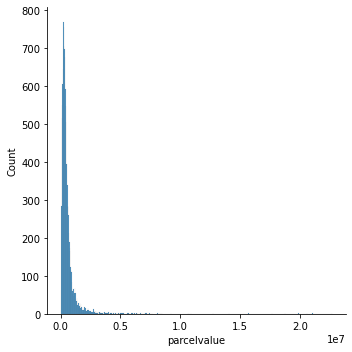

In [25]:
import seaborn as sns
#histogram

sns.displot(pd.Series(y_train))
#we see that the distribution of parcelvalue is highly positively skewed, so we might want to trasnform this to log
#this will change the interpretation of the coefficients
#but since we are doing machine learning, this step is not necessary

In [26]:
X_train = train.drop(['parcelvalue'], axis=1) #we create our the regressors training dataset by creating a dataframe that contains all elements of the train dataset execpt parcelvalue

In [27]:
X_train.head()

,numbath,numbedroom,finishedarea,countycode,numfireplace,numfullbath,heatingtype,latitude,longitude,lotarea,citycode,neighborhoodcode,regioncode,roomnum,year,taxyear
3,2.0,3,1757.0,6037,0,2.0,2.0,34252019,-118467570,8612.0,12447.0,116646.0,96371.0,0,1952.0,2015
6,3.0,3,1663.0,6037,0,3.0,2.0,34284508,-118493574,12102.0,12447.0,31817.0,96370.0,0,1961.0,2016
8,3.0,3,1777.0,6037,0,3.0,2.0,34076404,-118560997,363116.0,12447.0,19810.0,96120.0,0,1978.0,2015
9,3.0,4,2198.0,6037,0,3.0,2.0,34398126,-118448101,5815.0,54311.0,37739.0,96401.0,0,2000.0,2015
13,3.0,3,1231.0,6037,0,3.0,2.0,34315800,-118443000,140609.0,12447.0,34213.0,96368.0,0,1989.0,2015


In [28]:
X_train.shape # dimensions (12560, 570), one less than the train dataset itself because we do not have 'parcelvalue' here

(12560, 16)

In [29]:
X_test = test

In [30]:
X_test.head()

,numbath,numbedroom,finishedarea,countycode,numfireplace,numfullbath,heatingtype,latitude,longitude,lotarea,citycode,neighborhoodcode,regioncode,roomnum,year,taxyear
0,3.0,3,1618.0,6037,0,3.0,2.0,34048500,-118438000,19423.0,12447.0,118887.0,96006,0,1975.0,2015
1,2.0,3,1817.0,6037,0,2.0,2.0,34023816,-118429617,7625.0,12447.0,116415.0,96047,0,1948.0,2015
2,2.0,3,1549.0,6037,0,2.0,2.0,34125379,-117707983,11080.0,30908.0,764142.0,96469,0,1978.0,2016
3,3.0,3,1275.0,6037,0,3.0,2.0,33878735,-118171388,58881.0,46298.0,276476.0,96239,0,1991.0,2015
4,1.0,1,600.0,6037,0,1.0,2.0,33766300,-118188000,47343.0,46298.0,273486.0,96236,0,2004.0,2015


In [31]:
X_test.shape

(2746, 16)

In [32]:
print(X_train.shape)
print(X_test.shape)
#same dimensions as X_train

(12560, 16)
(2746, 16)


### Building the first model

Note that I will be repeating steps 4 to 8 multiple times since I will have different models, transformations of features, and parameter optimizations.



**Linear Regression using non-transformed features**
- we first try to fit our model based on non-transformed dataset

In [33]:
# Step 4: Build your model and get predictions from train data
from sklearn.linear_model import LinearRegression #import the Linear Regression 
regr = LinearRegression() #store the function to an object

regr.fit(X_train,y_train) #we fit the model
y_hat_train = regr.predict(X_train) #we produce predictions from our fitted model based on test data

In [34]:
print(y_hat_train)
y_hat_train.shape

[340698.44567266 389562.19449174 655912.31056881 ... 645718.1855565
 190698.87115797 461700.34246185]


(12560,)

Text(0.5, 1.0, 'R-squared equals 0.485')

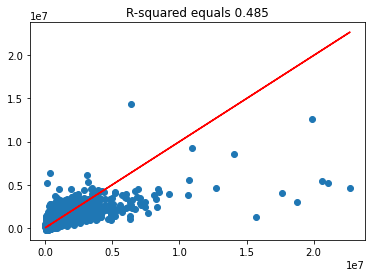

In [35]:
# Step 5: Assess expected accuracy

#we first assess the expected accurary of the model we have fitted using the original train and test datasets (the one without polynomial features and dummies)
##in-sample
import matplotlib.pylab as plt
from sklearn.metrics import r2_score

plt.figure() #creating a blank plot
plt.scatter(x=y_train,y=y_hat_train) #plotting the points
plt.plot(y_train,y_train,c="red") #plotting a 45 degree line
r_squared = r2_score(y_train, y_hat_train) #i use r_2 score instead of what Jack uses in class (getting correlation then squaring) because this is cleaner and more straightforward
plt.title('R-squared equals %.3f' %r_squared) 

# the value of R-squared is 0.485, there is some correlation between the y_train but not strong
#note that the interpretation of the red line is this: if all points lie on the red line, then there is perfect correlation
# we see that this is true for lower values of y_train but not for higher ones
#we can say that higher values are not predicted well by our model.
#therefore later on we need to optimize paramaters

In [36]:
#I keep on using this kind of plot, so I will create a function
# I have already imported this custom function in the beginning

#def my_r2_plot(y_train, y_hat_train):
    #plt.figure() 
    #plt.scatter(x=y_train,y=y_hat_train) 
    #plt.plot(y_train,y_train,c="red") 
    #r_squared = r2_score(y_train, y_hat_train)
    #plt.title('R-squared equals %.3f' %r_squared) 

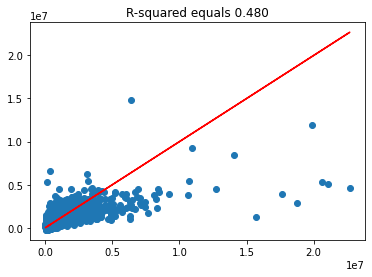

In [37]:
##producing cross-validated predictions
from sklearn.model_selection import cross_val_predict as cvp
y_hat_cv = cvp(regr, X_train, y_train, cv=80) # #try first cv=80 then leave-one-out CV when cv=12560      
                                  # and 12560 because n=12560 #leave-one-out taking so long so i'll put 50 first (100 k-folds)

#If a value for k is chosen that does not evenly split the data sample, 
#then one group will contain a remainder of the examples. 
#It is preferable to split the data sample into k groups with the same number of samples, 
#such that the sample of model skill scores are all equivalent. 
#from https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85
#I'll use 80 since it's a factor of 12560

my_r2_plot(y_train, y_hat_cv)

# the value of R-squared is 0.480, there is some correlation between the y_train but not strong
#therefore go back to previous steps and optimize paramaters

#also, note that the r-squared with cross-validated predictions is lower than the usual in-sample r-squared (0.480 < 0.485).
# in other words, the performance of the model decreased, but not drastically

#this is as expected since the fitted model will be better to produce predictions based on the data it has seen before than on the data it has never since
#but also note that the r-squares of the in-sample and out-sample are not that far. therefore we could say that there is no overfitting (the model is bad both on preicting in-sample and out-sample data)

In [38]:
#we could also use cross_val_score to assess expect accuracy 

#from sklearn.model_selection import cross_val_score as cvs

#accuracy = cvs(regr, X_train, y_train, scoring='accuracy', cv = 10)
#print(accuracy)

##but for some reason, the above code is not working as expected,
#checking stack exchange, the code may not be working because of the version of python that I'm using

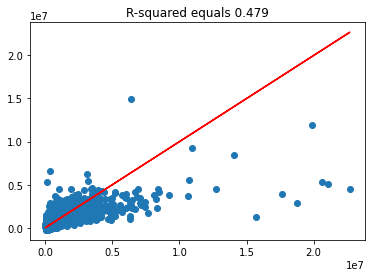

In [39]:
#We produce predicted values using leave-one-out cv just to see if it would be very different from cv=80.
y_hat_cv_LOO = cvp(regr, X_train, y_train, cv=2746) #this thing is taking so long

my_r2_plot(y_train,y_hat_cv_LOO )

In [40]:
print(r2_score(y_hat_cv,y_hat_cv_LOO))
#we just use cv=80 instead of leave-one-one since they have a large correlation (0.999937568174697) anyway

0.999937568174697


In [41]:
#Step 6:
print(regr.coef_)

[ 1.32620393e+03 -1.29300412e+05  4.60581717e+02  4.77561679e+04
  8.18587170e+03  7.35255336e+04  7.36656456e+03 -4.40660752e-02
 -8.28437449e-02  8.67978557e-03  3.27847429e-01 -4.46270086e-02
 -9.33637262e+02 -5.99413568e+04 -1.00267253e+03  2.08585452e+04]


In [42]:
#recall that
print(X_train.columns)

Index(['numbath', 'numbedroom', 'finishedarea', 'countycode', 'numfireplace',
       'numfullbath', 'heatingtype', 'latitude', 'longitude', 'lotarea',
       'citycode', 'neighborhoodcode', 'regioncode', 'roomnum', 'year',
       'taxyear'],
      dtype='object')


In [43]:
dict_zip(X_train.columns,regr.coef_)

{'numbath': 1326.2039280571723,
 'numbedroom': -129300.41236799417,
 'finishedarea': 460.5817168398698,
 'countycode': 47756.16792920671,
 'numfireplace': 8185.871704123346,
 'numfullbath': 73525.53363949487,
 'heatingtype': 7366.564557197168,
 'latitude': -0.044066075229713036,
 'longitude': -0.08284374486098192,
 'lotarea': 0.008679785566405605,
 'citycode': 0.32784742886277446,
 'neighborhoodcode': -0.0446270086175569,
 'regioncode': -933.6372621259222,
 'roomnum': -59941.35676516258,
 'year': -1002.6725332022841,
 'taxyear': 20858.545182381305}

So this means that:
- 1 additional bathroom increases the parcel value by 1326.20
- 1 additional bedroom decreass the parcel value by 129300.41
- 1 additional unit of finished are increases the parcel value by 460.58
- and so on and so forth. 

Some have counter intuitive signs but we will ignore this for now as this is not our final model.
Further, the one with the highest magnitude is number of bedrooms, with an absolute value of 129,300, which is also counterintuitive. But we will ignore this for now.

In [44]:
#Step 7: Prepare code to run and check performance of you model using a new input data with same exact format
y_hat_test = regr.predict(X_test) #we produce predictions from our fitted model based on test data

### Some more data preparation

**Polynomial Features and Dummy Variables**

Next we try the model with polynomial features and dummies.

I carefully separate the variables that I will use for plf and dummies.

I separated them because for me, it does not make much sense to generate polynomial features of dummy variables since this will just generate more duplicate columns (with terms such as 1^2, 1^3, 0^2, 0^3 whihch does not make any sense, and would just make perfectly collineary columns) and would make the computation time too long.

Note to self: careful to make the variable names not confusing

Let f be a shorthand for feature (to mark without making the var names too long) and let d be a shorthand for dummies.

I thought of not getting the polynomial features of year and tax year because for me, it makes little sense to get variable transformations of these, therefore I will not include them in my feautures dataset

*Dummy Variable Generation*

Let's check first the number of unique variables that we plan to have dummies on.

In [45]:
potential = ['heatingtype', 'citycode', 'countycode', 'neighborhoodcode', 'regioncode']

In [46]:
for i in potential:
    print(len(pd.unique(train[i])))

for i in potential:
    print(len(pd.unique(test[i])))

5
23
2
337
196
4
22
2
253
168


In [47]:
def len_unique_print(c,d):
    for i in d:
        print(len(pd.unique(c[i])))

In [48]:
len_unique_print(train,potential)

5
23
2
337
196


We observe that there are too many unique values for neighborhoodcode and regioncode for both the train and test datasets
We will also create dummy for regioncode and neighborhoodcode but we will impose additional constraints on which values we are making dummies on. I only want to create dummies for neighborhoods and regions that occurs frequently in our dataset. Hence, I will use a cut-off.

We prepare our neigborhoodcode and regioncode columns so that they won't be too many when we generate dummies. I will do the one for neighborhoods first.

Later on, it is also important to make sure that the dummies in the train dataset will be the same as in the test dataset. 

In [49]:
neighborhood_stats = X_train['neighborhoodcode'].value_counts(ascending=False) #we count the number of unique values, sort them from highest to lowest, store the results to neighborhood_stats
neighborhood_stats

48570.0     663
51906.0     472
33183.0     424
27080.0     415
37739.0     382
           ... 
273677.0      1
416333.0      1
763219.0      1
274392.0      1
762192.0      1
Name: neighborhoodcode, Length: 337, dtype: int64

In [50]:
neighborhood_stats.values.sum() #checking if it would sum to total number of obs, and it is

12560

In [51]:
len(neighborhood_stats[neighborhood_stats>100]) #counting neighborhoodcodes with more than 100 obs
#I've decided that I am okay with have 30+1-1 dummies (neighborhoodcodes with more than 100 obs + others - drop_first)

30

In [52]:
len(neighborhood_stats[neighborhood_stats<=100]) #there are 307 neighborhoods with less than 100 obs
#all of these neighborhoods will be identified as others later

307

In [53]:
neighborhood_stats_less_than_100 = neighborhood_stats[neighborhood_stats<=100] #we store the neighborhoods will less than 100 obs
neighborhood_stats_less_than_100

114914.0    97
268551.0    97
32368.0     96
40215.0     86
46795.0     86
            ..
273677.0     1
416333.0     1
763219.0     1
274392.0     1
762192.0     1
Name: neighborhoodcode, Length: 307, dtype: int64

In [54]:
neighborhood_stats_less_than_100.shape #contains one column of the number of obs of neighborhoods with less than 100 obs

(307,)

In [55]:
len(X_train.neighborhoodcode.unique())

337

In [56]:
X_train.neighborhoodcode = X_train.neighborhoodcode.apply(lambda x: 'other' if x in neighborhood_stats_less_than_100 else x) #we are replacing the values with 'other' for those neighborhoods with less than 100 obs
len(X_train.neighborhoodcode.unique()) #now, we only have 31 unique neighborhoodcodes instead of 337

31

In [57]:
X_train.head()

,numbath,numbedroom,finishedarea,countycode,numfireplace,numfullbath,heatingtype,latitude,longitude,lotarea,citycode,neighborhoodcode,regioncode,roomnum,year,taxyear
3,2.0,3,1757.0,6037,0,2.0,2.0,34252019,-118467570,8612.0,12447.0,other,96371.0,0,1952.0,2015
6,3.0,3,1663.0,6037,0,3.0,2.0,34284508,-118493574,12102.0,12447.0,31817.0,96370.0,0,1961.0,2016
8,3.0,3,1777.0,6037,0,3.0,2.0,34076404,-118560997,363116.0,12447.0,19810.0,96120.0,0,1978.0,2015
9,3.0,4,2198.0,6037,0,3.0,2.0,34398126,-118448101,5815.0,54311.0,37739.0,96401.0,0,2000.0,2015
13,3.0,3,1231.0,6037,0,3.0,2.0,34315800,-118443000,140609.0,12447.0,34213.0,96368.0,0,1989.0,2015


Now, doing the same for regions.

In [58]:
region_stats = X_train['regioncode'].value_counts(ascending=False) #we count the number of unique values, sort them from highest to lowest, store the results to region_stats
region_stats

96389.0    414
96364.0    335
96379.0    322
96356.0    320
96339.0    298
          ... 
96069.0      1
96957.0      1
96954.0      1
96217.0      1
97065.0      1
Name: regioncode, Length: 196, dtype: int64

In [59]:
region_stats.values.sum()

12560

In [60]:
len(region_stats[region_stats>100])

42

In [61]:
len(region_stats)

196

In [62]:
len(region_stats[region_stats<=100])

154

In [63]:
region_stats_less_than_100 = region_stats[region_stats<=100]
region_stats_less_than_100

96128.0    97
96447.0    97
96242.0    92
96222.0    91
96469.0    90
           ..
96069.0     1
96957.0     1
96954.0     1
96217.0     1
97065.0     1
Name: regioncode, Length: 154, dtype: int64

In [64]:
len(X_train.regioncode.unique())

196

In [65]:
X_train.regioncode = X_train.regioncode.apply(lambda x: 'other' if x in region_stats_less_than_100 else x) # #we are replacing the values with 'other' for those regions with less than 100 obs
len(X_train.regioncode.unique()) #now, we only have 43 unique regioncodes instead of 196

43

In [66]:
X_train.head()

,numbath,numbedroom,finishedarea,countycode,numfireplace,numfullbath,heatingtype,latitude,longitude,lotarea,citycode,neighborhoodcode,regioncode,roomnum,year,taxyear
3,2.0,3,1757.0,6037,0,2.0,2.0,34252019,-118467570,8612.0,12447.0,other,other,0,1952.0,2015
6,3.0,3,1663.0,6037,0,3.0,2.0,34284508,-118493574,12102.0,12447.0,31817.0,96370.0,0,1961.0,2016
8,3.0,3,1777.0,6037,0,3.0,2.0,34076404,-118560997,363116.0,12447.0,19810.0,96120.0,0,1978.0,2015
9,3.0,4,2198.0,6037,0,3.0,2.0,34398126,-118448101,5815.0,54311.0,37739.0,96401.0,0,2000.0,2015
13,3.0,3,1231.0,6037,0,3.0,2.0,34315800,-118443000,140609.0,12447.0,34213.0,96368.0,0,1989.0,2015


In [67]:
X_train.shape

(12560, 16)

We do the same encoding for the test dataset.

Note that we only do the last step because we want the test dataset to have the same dummies as the train dataset.

In [68]:
X_test.neighborhoodcode = X_test.neighborhoodcode.apply(lambda x: 'other' if x in neighborhood_stats_less_than_100 else x)
len(X_test.neighborhoodcode.unique())

38

In [69]:
X_test.regioncode = X_test.regioncode.apply(lambda x: 'other' if x in region_stats_less_than_100 else x)
len(X_test.regioncode.unique())

44

For some reason, there is more than one neighborhoodcode and one regioncode in the test data compared to the train. I will just drop the extra dummy from the test dataset later while doing the data alignment.

In [70]:
pd.set_option("display.max_rows", None, "display.max_columns", None) #I just checked all the obs of the test to make sure there's nothing weird going on.
print(X_test['neighborhoodcode'])

0          other
1          other
2          other
3          other
4          other
5       268588.0
6        51906.0
7       274049.0
8        30731.0
9       118920.0
10         other
11       47950.0
12      268548.0
13       48570.0
14        6952.0
15       48200.0
16      275078.0
17       51906.0
18       19810.0
19       34213.0
20         other
21       47950.0
22       51906.0
23       48570.0
24       47880.0
25       19810.0
26      268588.0
27       48570.0
28       48200.0
29       33183.0
30       51906.0
31      268588.0
32      268588.0
33       33183.0
34       31817.0
35         other
36      268588.0
37         other
38       34213.0
39       37835.0
40      275405.0
41       27987.0
42         other
43       51906.0
44       30731.0
45       27080.0
46         other
47       41466.0
48         other
49      268588.0
50         other
51       33183.0
52       27987.0
53         other
54      113910.0
55         other
56         other
57       33183.0
58         oth

Now we finally generate the dummies. Note that I will be dropping the first columns using drop_first=True to avoid the dummy variable trap.

We generate the dummies for the train.

In [71]:
X_train_d = X_train[potential]

In [72]:
X_train_d = pd.get_dummies(X_train_d, columns=potential,drop_first=True)

In [73]:
X_train_d.head()

,heatingtype_6.0,heatingtype_7.0,heatingtype_18.0,heatingtype_20.0,citycode_12447.0,citycode_12520.0,citycode_16764.0,citycode_26964.0,citycode_30908.0,citycode_33612.0,citycode_37688.0,citycode_39308.0,citycode_42150.0,citycode_45457.0,citycode_46298.0,citycode_47019.0,citycode_47568.0,citycode_48424.0,citycode_51617.0,citycode_51861.0,citycode_52650.0,citycode_53571.0,citycode_54299.0,citycode_54311.0,citycode_54722.0,citycode_396054.0,countycode_6059,neighborhoodcode_13017.0,neighborhoodcode_13176.0,neighborhoodcode_19810.0,neighborhoodcode_26134.0,neighborhoodcode_27080.0,neighborhoodcode_27987.0,neighborhoodcode_30731.0,neighborhoodcode_31817.0,neighborhoodcode_33183.0,neighborhoodcode_34213.0,neighborhoodcode_37739.0,neighborhoodcode_37835.0,neighborhoodcode_40548.0,neighborhoodcode_41131.0,neighborhoodcode_41466.0,neighborhoodcode_47880.0,neighborhoodcode_47950.0,neighborhoodcode_48200.0,neighborhoodcode_48570.0,neighborhoodcode_51906.0,neighborhoodcode_54300.0,neighborhoodcode_113749.0,neighborhoodcode_113910.0,neighborhoodcode_118920.0,neighborhoodcode_268548.0,neighborhoodcode_268588.0,neighborhoodcode_274049.0,neighborhoodcode_275078.0,neighborhoodcode_275405.0,neighborhoodcode_other,regioncode_96006.0,regioncode_96023.0,regioncode_96027.0,regioncode_96030.0,regioncode_96049.0,regioncode_96120.0,regioncode_96247.0,regioncode_96294.0,regioncode_96321.0,regioncode_96325.0,regioncode_96336.0,regioncode_96339.0,regioncode_96341.0,regioncode_96342.0,regioncode_96346.0,regioncode_96349.0,regioncode_96352.0,regioncode_96354.0,regioncode_96355.0,regioncode_96356.0,regioncode_96361.0,regioncode_96364.0,regioncode_96368.0,regioncode_96369.0,regioncode_96370.0,regioncode_96373.0,regioncode_96374.0,regioncode_96377.0,regioncode_96378.0,regioncode_96379.0,regioncode_96387.0,regioncode_96389.0,regioncode_96401.0,regioncode_96410.0,regioncode_96411.0,regioncode_96412.0,regioncode_96415.0,regioncode_96424.0,regioncode_96426.0,regioncode_96449.0,regioncode_96452.0,regioncode_other
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
13,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [74]:
X_train_d.shape

(12560, 99)

We generate the dummies for the test.

In [75]:
X_test_d = X_test[potential]

In [76]:
X_test_d = pd.get_dummies(X_test_d, columns=potential,drop_first=True)

In [77]:
X_test_d.head()

,heatingtype_6.0,heatingtype_7.0,heatingtype_20.0,citycode_12447.0,citycode_12520.0,citycode_16764.0,citycode_26964.0,citycode_30908.0,citycode_33612.0,citycode_37688.0,citycode_39308.0,citycode_42150.0,citycode_45457.0,citycode_46298.0,citycode_47019.0,citycode_47568.0,citycode_48424.0,citycode_51617.0,citycode_51861.0,citycode_52650.0,citycode_54299.0,citycode_54311.0,citycode_54722.0,citycode_396054.0,countycode_6059,neighborhoodcode_13017.0,neighborhoodcode_13176.0,neighborhoodcode_19810.0,neighborhoodcode_26134.0,neighborhoodcode_27080.0,neighborhoodcode_27987.0,neighborhoodcode_30731.0,neighborhoodcode_31817.0,neighborhoodcode_33183.0,neighborhoodcode_34213.0,neighborhoodcode_37739.0,neighborhoodcode_37835.0,neighborhoodcode_40548.0,neighborhoodcode_41131.0,neighborhoodcode_41466.0,neighborhoodcode_47880.0,neighborhoodcode_47950.0,neighborhoodcode_48200.0,neighborhoodcode_48570.0,neighborhoodcode_51906.0,neighborhoodcode_54300.0,neighborhoodcode_113749.0,neighborhoodcode_113910.0,neighborhoodcode_118920.0,neighborhoodcode_268160.0,neighborhoodcode_268392.0,neighborhoodcode_268548.0,neighborhoodcode_268588.0,neighborhoodcode_273198.0,neighborhoodcode_273615.0,neighborhoodcode_274049.0,neighborhoodcode_275078.0,neighborhoodcode_275405.0,neighborhoodcode_275695.0,neighborhoodcode_416319.0,neighborhoodcode_762184.0,neighborhoodcode_other,regioncode_96006,regioncode_96023,regioncode_96027,regioncode_96030,regioncode_96049,regioncode_96120,regioncode_96247,regioncode_96294,regioncode_96321,regioncode_96325,regioncode_96336,regioncode_96339,regioncode_96341,regioncode_96342,regioncode_96346,regioncode_96349,regioncode_96352,regioncode_96354,regioncode_96355,regioncode_96356,regioncode_96361,regioncode_96364,regioncode_96368,regioncode_96369,regioncode_96370,regioncode_96373,regioncode_96374,regioncode_96377,regioncode_96378,regioncode_96379,regioncode_96385,regioncode_96387,regioncode_96389,regioncode_96401,regioncode_96410,regioncode_96411,regioncode_96412,regioncode_96415,regioncode_96424,regioncode_96426,regioncode_96449,regioncode_96452,regioncode_other
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [78]:
X_test_d.shape

(2746, 105)

Our sub-DataFrame with dummies for the train dataset have 99 columns, while for the test, there are 105. This has occured because when we stored the neighborhoodcodes and regioncodes with less than 100 observations, some codes in neighborhoodcodes and regioncodes that should've been identified as other was for the test was not identified. This is just a small difference so we will just solve this by dropping the extra dummies while we align later.

In [79]:
#we store the variable names of the dummy because this will be important later on when we are matching the number of columns in the train and test dataset
#we need to store the column names of these dummies because it will be gone once we convert it to numpy array or concatenate it later
X_train_d_columns = list(X_train_d.columns)
X_test_d_columns = list(X_test_d.columns)

In [80]:
#just checking if the column names were stored properly
X_test_d_columns
X_train_d_columns

['heatingtype_6.0',
 'heatingtype_7.0',
 'heatingtype_18.0',
 'heatingtype_20.0',
 'citycode_12447.0',
 'citycode_12520.0',
 'citycode_16764.0',
 'citycode_26964.0',
 'citycode_30908.0',
 'citycode_33612.0',
 'citycode_37688.0',
 'citycode_39308.0',
 'citycode_42150.0',
 'citycode_45457.0',
 'citycode_46298.0',
 'citycode_47019.0',
 'citycode_47568.0',
 'citycode_48424.0',
 'citycode_51617.0',
 'citycode_51861.0',
 'citycode_52650.0',
 'citycode_53571.0',
 'citycode_54299.0',
 'citycode_54311.0',
 'citycode_54722.0',
 'citycode_396054.0',
 'countycode_6059',
 'neighborhoodcode_13017.0',
 'neighborhoodcode_13176.0',
 'neighborhoodcode_19810.0',
 'neighborhoodcode_26134.0',
 'neighborhoodcode_27080.0',
 'neighborhoodcode_27987.0',
 'neighborhoodcode_30731.0',
 'neighborhoodcode_31817.0',
 'neighborhoodcode_33183.0',
 'neighborhoodcode_34213.0',
 'neighborhoodcode_37739.0',
 'neighborhoodcode_37835.0',
 'neighborhoodcode_40548.0',
 'neighborhoodcode_41131.0',
 'neighborhoodcode_41466.0',


In [81]:
print(len(X_train_d_columns))
print(len(X_test_d_columns))

99
105


I store the year and tax year variables as we will drop them later when we generate polynomail features.

In [82]:
X_train_year = X_train[['year', 'taxyear']]

In [83]:
X_test_year = X_test[['year', 'taxyear']]

*Creating Polynomial Features*

I create a sub-DataFrame that will contain the features that I want to transform using polynomial features.

I do this for both the train and test dataset.

In [84]:
X_train_f = X_train.drop(['heatingtype', 'citycode', 'countycode', 'neighborhoodcode', 'regioncode', 'year', 'taxyear'], axis = 1)

In [85]:
X_train_f.head()

,numbath,numbedroom,finishedarea,numfireplace,numfullbath,latitude,longitude,lotarea,roomnum
3,2.0,3,1757.0,0,2.0,34252019,-118467570,8612.0,0
6,3.0,3,1663.0,0,3.0,34284508,-118493574,12102.0,0
8,3.0,3,1777.0,0,3.0,34076404,-118560997,363116.0,0
9,3.0,4,2198.0,0,3.0,34398126,-118448101,5815.0,0
13,3.0,3,1231.0,0,3.0,34315800,-118443000,140609.0,0


In [86]:
#do the same for the test data
X_test_f = X_test.drop(['heatingtype', 'citycode', 'countycode', 'neighborhoodcode', 'regioncode', 'year', 'taxyear'], axis = 1)

In [87]:
X_test_f.head()

,numbath,numbedroom,finishedarea,numfireplace,numfullbath,latitude,longitude,lotarea,roomnum
0,3.0,3,1618.0,0,3.0,34048500,-118438000,19423.0,0
1,2.0,3,1817.0,0,2.0,34023816,-118429617,7625.0,0
2,2.0,3,1549.0,0,2.0,34125379,-117707983,11080.0,0
3,3.0,3,1275.0,0,3.0,33878735,-118171388,58881.0,0
4,1.0,1,600.0,0,1.0,33766300,-118188000,47343.0,0


In [88]:
print(X_train_f.shape)
print(X_test_f.shape)

#we will be using the dataframes above later to generate features

(12560, 9)
(2746, 9)


Now we finally generate the polynomial features.

In [89]:
from sklearn.preprocessing import PolynomialFeatures as plf

In [90]:
#first, let's try plf of order 2
#note that I'm not doing instantiate and fit in one go because when I tried it, there are having errors when I use the .get_feature_names method
order = 2
poly = plf(order)

phi_train = poly.fit_transform(X_train_f)
phi_test = poly.fit_transform(X_test_f)

Note that I have tried having polynomial features of order 5, 4, and 3 respectively. But I couldn't fit the lasso without taking so much time, so I resort to 2. 

Further, for this dataset, I see no reason why there will be cubic and high order relationships for the features. But if I had more computing power, having higher-ordered features will be interesting if it wouldn't be zeroed out by an optimized Lasso model.

In [91]:
#we compare the number of columns in before and after the plf (9 vs. 55)

print(X_train_f.shape)
print(X_test_f.shape)

print(phi_train.shape)
print(phi_test.shape)

(12560, 9)
(2746, 9)
(12560, 55)
(2746, 55)


Notice that the dimensions of the features is 55 since polynomial features not only adds powers of each feature but also the interactions between them. Therefore, if we initial have 9 features, we do not just expect 9*2+1 in our new matrix phi_train.

The formula for calculating the number of the polynomial features is N(n,d)=C(n+d,d) where n is the number of the features, d is the degree of the polynomial, C is binomial coefficient(combination). So in this case, we have:

In [92]:
import math

math.factorial(11)/(math.factorial(11-2)*math.factorial(2))

55.0

In [93]:
def how_many_features(n,d):
    return math.factorial(n+d)/(math.factorial(n+d-d)*math.factorial(d))

In [94]:
how_many_features(9,2)

55.0

In [95]:
pd.DataFrame(phi_train).head()
#we observe that the features we have transformed trhu plf have no column names
#but we can get their names (as shown in the next cell)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
0,1.0,2.0,3.0,1757.0,0.0,2.0,34252019.0,-118467570.0,8612.0,0.0,4.0,6.0,3514.0,0.0,4.0,68504038.0,-236935140.0,17224.0,0.0,9.0,5271.0,0.0,6.0,102756057.0,-355402710.0,25836.0,0.0,3087049.0,0.0,3514.0,6.018080e+10,-2.081475e+11,15131284.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,4.0,68504038.0,-236935140.0,17224.0,0.0,1.173201e+15,-4.057753e+15,2.949784e+11,0.0,1.403457e+16,-1.020243e+12,-0.0,7.416654e+07,0.0,0.0
1,1.0,3.0,3.0,1663.0,0.0,3.0,34284508.0,-118493574.0,12102.0,0.0,9.0,9.0,4989.0,0.0,9.0,102853524.0,-355480722.0,36306.0,0.0,9.0,4989.0,0.0,9.0,102853524.0,-355480722.0,36306.0,0.0,2765569.0,0.0,4989.0,5.701514e+10,-1.970548e+11,20125626.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,9.0,102853524.0,-355480722.0,36306.0,0.0,1.175427e+15,-4.062494e+15,4.149111e+11,0.0,1.404073e+16,-1.434009e+12,-0.0,1.464584e+08,0.0,0.0
2,1.0,3.0,3.0,1777.0,0.0,3.0,34076404.0,-118560997.0,363116.0,0.0,9.0,9.0,5331.0,0.0,9.0,102229212.0,-355682991.0,1089348.0,0.0,9.0,5331.0,0.0,9.0,102229212.0,-355682991.0,1089348.0,0.0,3157729.0,0.0,5331.0,6.055377e+10,-2.106829e+11,645257132.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,9.0,102229212.0,-355682991.0,1089348.0,0.0,1.161201e+15,-4.040132e+15,1.237369e+13,0.0,1.405671e+16,-4.305139e+13,-0.0,1.318532e+11,0.0,0.0
3,1.0,3.0,4.0,2198.0,0.0,3.0,34398126.0,-118448101.0,5815.0,0.0,9.0,12.0,6594.0,0.0,9.0,103194378.0,-355344303.0,17445.0,0.0,16.0,8792.0,0.0,12.0,137592504.0,-473792404.0,23260.0,0.0,4831204.0,0.0,6594.0,7.560708e+10,-2.603489e+11,12781370.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,9.0,103194378.0,-355344303.0,17445.0,0.0,1.183231e+15,-4.074393e+15,2.000251e+11,0.0,1.402995e+16,-6.887757e+11,-0.0,3.381422e+07,0.0,0.0
4,1.0,3.0,3.0,1231.0,0.0,3.0,34315800.0,-118443000.0,140609.0,0.0,9.0,9.0,3693.0,0.0,9.0,102947400.0,-355329000.0,421827.0,0.0,9.0,3693.0,0.0,9.0,102947400.0,-355329000.0,421827.0,0.0,1515361.0,0.0,3693.0,4.224275e+10,-1.458033e+11,173089679.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,9.0,102947400.0,-355329000.0,421827.0,0.0,1.177574e+15,-4.064466e+15,4.825110e+12,0.0,1.402874e+16,-1.665415e+13,-0.0,1.977089e+10,0.0,0.0


In [96]:
#let's store the names of these features because it's important for the test and train dataset alignment later
import numpy as np
phi_train_columns = np.array(poly.get_feature_names(X_train_f.columns))
phi_test_columns = np.array(poly.get_feature_names(X_test_f.columns))

In [97]:
phi_train_columns

array(['1', 'numbath', 'numbedroom', 'finishedarea', 'numfireplace',
       'numfullbath', 'latitude', 'longitude', 'lotarea', 'roomnum',
       'numbath^2', 'numbath numbedroom', 'numbath finishedarea',
       'numbath numfireplace', 'numbath numfullbath', 'numbath latitude',
       'numbath longitude', 'numbath lotarea', 'numbath roomnum',
       'numbedroom^2', 'numbedroom finishedarea',
       'numbedroom numfireplace', 'numbedroom numfullbath',
       'numbedroom latitude', 'numbedroom longitude',
       'numbedroom lotarea', 'numbedroom roomnum', 'finishedarea^2',
       'finishedarea numfireplace', 'finishedarea numfullbath',
       'finishedarea latitude', 'finishedarea longitude',
       'finishedarea lotarea', 'finishedarea roomnum', 'numfireplace^2',
       'numfireplace numfullbath', 'numfireplace latitude',
       'numfireplace longitude', 'numfireplace lotarea',
       'numfireplace roomnum', 'numfullbath^2', 'numfullbath latitude',
       'numfullbath longitude', 'numful

In [98]:
#let's concatenate the columns names for both the dummies and the features, as well as the years columns
final_X_train_columns = np.concatenate([phi_train_columns, X_train_year.columns, X_train_d_columns])
final_X_test_columns = np.concatenate([phi_test_columns, X_test_year.columns, X_test_d_columns])

In [99]:
print(final_X_train_columns.shape)
print(final_X_test_columns.shape)

(156,)
(162,)


In [100]:
print(final_X_train_columns)
print(final_X_test_columns)

['1' 'numbath' 'numbedroom' 'finishedarea' 'numfireplace' 'numfullbath'
 'latitude' 'longitude' 'lotarea' 'roomnum' 'numbath^2'
 'numbath numbedroom' 'numbath finishedarea' 'numbath numfireplace'
 'numbath numfullbath' 'numbath latitude' 'numbath longitude'
 'numbath lotarea' 'numbath roomnum' 'numbedroom^2'
 'numbedroom finishedarea' 'numbedroom numfireplace'
 'numbedroom numfullbath' 'numbedroom latitude' 'numbedroom longitude'
 'numbedroom lotarea' 'numbedroom roomnum' 'finishedarea^2'
 'finishedarea numfireplace' 'finishedarea numfullbath'
 'finishedarea latitude' 'finishedarea longitude' 'finishedarea lotarea'
 'finishedarea roomnum' 'numfireplace^2' 'numfireplace numfullbath'
 'numfireplace latitude' 'numfireplace longitude' 'numfireplace lotarea'
 'numfireplace roomnum' 'numfullbath^2' 'numfullbath latitude'
 'numfullbath longitude' 'numfullbath lotarea' 'numfullbath roomnum'
 'latitude^2' 'latitude longitude' 'latitude lotarea' 'latitude roomnum'
 'longitude^2' 'longitude lotar

We combine the generated dummies, years, and generated polynomial features to have our almost final datasets. (Almost final because we will have to do rescaling later). Note that this dataset contains a constant term.

In [101]:
final_X_train = np.concatenate((phi_train, X_train_year, X_train_d), axis=1)
final_X_test = np.concatenate((phi_test, X_test_year, X_test_d), axis=1)

In [102]:
final_X_train = pd.DataFrame(final_X_train)
final_X_test = pd.DataFrame(final_X_test)

In [103]:
final_X_train.columns = final_X_train_columns
final_X_test.columns = final_X_test_columns

In [104]:
pd.DataFrame(final_X_train).head()

,1,numbath,numbedroom,finishedarea,numfireplace,numfullbath,latitude,longitude,lotarea,roomnum,numbath^2,numbath numbedroom,numbath finishedarea,numbath numfireplace,numbath numfullbath,numbath latitude,numbath longitude,numbath lotarea,numbath roomnum,numbedroom^2,numbedroom finishedarea,numbedroom numfireplace,numbedroom numfullbath,numbedroom latitude,numbedroom longitude,numbedroom lotarea,numbedroom roomnum,finishedarea^2,finishedarea numfireplace,finishedarea numfullbath,finishedarea latitude,finishedarea longitude,finishedarea lotarea,finishedarea roomnum,numfireplace^2,numfireplace numfullbath,numfireplace latitude,numfireplace longitude,numfireplace lotarea,numfireplace roomnum,numfullbath^2,numfullbath latitude,numfullbath longitude,numfullbath lotarea,numfullbath roomnum,latitude^2,latitude longitude,latitude lotarea,latitude roomnum,longitude^2,longitude lotarea,longitude roomnum,lotarea^2,lotarea roomnum,roomnum^2,year,taxyear,heatingtype_6.0,heatingtype_7.0,heatingtype_18.0,heatingtype_20.0,citycode_12447.0,citycode_12520.0,citycode_16764.0,citycode_26964.0,citycode_30908.0,citycode_33612.0,citycode_37688.0,citycode_39308.0,citycode_42150.0,citycode_45457.0,citycode_46298.0,citycode_47019.0,citycode_47568.0,citycode_48424.0,citycode_51617.0,citycode_51861.0,citycode_52650.0,citycode_53571.0,citycode_54299.0,citycode_54311.0,citycode_54722.0,citycode_396054.0,countycode_6059,neighborhoodcode_13017.0,neighborhoodcode_13176.0,neighborhoodcode_19810.0,neighborhoodcode_26134.0,neighborhoodcode_27080.0,neighborhoodcode_27987.0,neighborhoodcode_30731.0,neighborhoodcode_31817.0,neighborhoodcode_33183.0,neighborhoodcode_34213.0,neighborhoodcode_37739.0,neighborhoodcode_37835.0,neighborhoodcode_40548.0,neighborhoodcode_41131.0,neighborhoodcode_41466.0,neighborhoodcode_47880.0,neighborhoodcode_47950.0,neighborhoodcode_48200.0,neighborhoodcode_48570.0,neighborhoodcode_51906.0,neighborhoodcode_54300.0,neighborhoodcode_113749.0,neighborhoodcode_113910.0,neighborhoodcode_118920.0,neighborhoodcode_268548.0,neighborhoodcode_268588.0,neighborhoodcode_274049.0,neighborhoodcode_275078.0,neighborhoodcode_275405.0,neighborhoodcode_other,regioncode_96006.0,regioncode_96023.0,regioncode_96027.0,regioncode_96030.0,regioncode_96049.0,regioncode_96120.0,regioncode_96247.0,regioncode_96294.0,regioncode_96321.0,regioncode_96325.0,regioncode_96336.0,regioncode_96339.0,regioncode_96341.0,regioncode_96342.0,regioncode_96346.0,regioncode_96349.0,regioncode_96352.0,regioncode_96354.0,regioncode_96355.0,regioncode_96356.0,regioncode_96361.0,regioncode_96364.0,regioncode_96368.0,regioncode_96369.0,regioncode_96370.0,regioncode_96373.0,regioncode_96374.0,regioncode_96377.0,regioncode_96378.0,regioncode_96379.0,regioncode_96387.0,regioncode_96389.0,regioncode_96401.0,regioncode_96410.0,regioncode_96411.0,regioncode_96412.0,regioncode_96415.0,regioncode_96424.0,regioncode_96426.0,regioncode_96449.0,regioncode_96452.0,regioncode_other
0,1.0,2.0,3.0,1757.0,0.0,2.0,34252019.0,-118467570.0,8612.0,0.0,4.0,6.0,3514.0,0.0,4.0,68504038.0,-236935140.0,17224.0,0.0,9.0,5271.0,0.0,6.0,102756057.0,-355402710.0,25836.0,0.0,3087049.0,0.0,3514.0,6.018080e+10,-2.081475e+11,15131284.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,4.0,68504038.0,-236935140.0,17224.0,0.0,1.173201e+15,-4.057753e+15,2.949784e+11,0.0,1.403457e+16,-1.020243e+12,-0.0,7.416654e+07,0.0,0.0,1952.0,2015.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,3.0,3.0,1663.0,0.0,3.0,34284508.0,-118493574.0,12102.0,0.0,9.0,9.0,4989.0,0.0,9.0,102853524.0,-355480722.0,36306.0,0.0,9.0,4989.0,0.0,9.0,102853524.0,-355480722.0,36306.0,0.0,2765569.0,0.0,4989.0,5.701514e+10,-1.97054

In [105]:
pd.DataFrame(final_X_test).head()

,1,numbath,numbedroom,finishedarea,numfireplace,numfullbath,latitude,longitude,lotarea,roomnum,numbath^2,numbath numbedroom,numbath finishedarea,numbath numfireplace,numbath numfullbath,numbath latitude,numbath longitude,numbath lotarea,numbath roomnum,numbedroom^2,numbedroom finishedarea,numbedroom numfireplace,numbedroom numfullbath,numbedroom latitude,numbedroom longitude,numbedroom lotarea,numbedroom roomnum,finishedarea^2,finishedarea numfireplace,finishedarea numfullbath,finishedarea latitude,finishedarea longitude,finishedarea lotarea,finishedarea roomnum,numfireplace^2,numfireplace numfullbath,numfireplace latitude,numfireplace longitude,numfireplace lotarea,numfireplace roomnum,numfullbath^2,numfullbath latitude,numfullbath longitude,numfullbath lotarea,numfullbath roomnum,latitude^2,latitude longitude,latitude lotarea,latitude roomnum,longitude^2,longitude lotarea,longitude roomnum,lotarea^2,lotarea roomnum,roomnum^2,year,taxyear,heatingtype_6.0,heatingtype_7.0,heatingtype_20.0,citycode_12447.0,citycode_12520.0,citycode_16764.0,citycode_26964.0,citycode_30908.0,citycode_33612.0,citycode_37688.0,citycode_39308.0,citycode_42150.0,citycode_45457.0,citycode_46298.0,citycode_47019.0,citycode_47568.0,citycode_48424.0,citycode_51617.0,citycode_51861.0,citycode_52650.0,citycode_54299.0,citycode_54311.0,citycode_54722.0,citycode_396054.0,countycode_6059,neighborhoodcode_13017.0,neighborhoodcode_13176.0,neighborhoodcode_19810.0,neighborhoodcode_26134.0,neighborhoodcode_27080.0,neighborhoodcode_27987.0,neighborhoodcode_30731.0,neighborhoodcode_31817.0,neighborhoodcode_33183.0,neighborhoodcode_34213.0,neighborhoodcode_37739.0,neighborhoodcode_37835.0,neighborhoodcode_40548.0,neighborhoodcode_41131.0,neighborhoodcode_41466.0,neighborhoodcode_47880.0,neighborhoodcode_47950.0,neighborhoodcode_48200.0,neighborhoodcode_48570.0,neighborhoodcode_51906.0,neighborhoodcode_54300.0,neighborhoodcode_113749.0,neighborhoodcode_113910.0,neighborhoodcode_118920.0,neighborhoodcode_268160.0,neighborhoodcode_268392.0,neighborhoodcode_268548.0,neighborhoodcode_268588.0,neighborhoodcode_273198.0,neighborhoodcode_273615.0,neighborhoodcode_274049.0,neighborhoodcode_275078.0,neighborhoodcode_275405.0,neighborhoodcode_275695.0,neighborhoodcode_416319.0,neighborhoodcode_762184.0,neighborhoodcode_other,regioncode_96006,regioncode_96023,regioncode_96027,regioncode_96030,regioncode_96049,regioncode_96120,regioncode_96247,regioncode_96294,regioncode_96321,regioncode_96325,regioncode_96336,regioncode_96339,regioncode_96341,regioncode_96342,regioncode_96346,regioncode_96349,regioncode_96352,regioncode_96354,regioncode_96355,regioncode_96356,regioncode_96361,regioncode_96364,regioncode_96368,regioncode_96369,regioncode_96370,regioncode_96373,regioncode_96374,regioncode_96377,regioncode_96378,regioncode_96379,regioncode_96385,regioncode_96387,regioncode_96389,regioncode_96401,regioncode_96410,regioncode_96411,regioncode_96412,regioncode_96415,regioncode_96424,regioncode_96426,regioncode_96449,regioncode_96452,regioncode_other
0,1.0,3.0,3.0,1618.0,0.0,3.0,34048500.0,-118438000.0,19423.0,0.0,9.0,9.0,4854.0,0.0,9.0,102145500.0,-355314000.0,58269.0,0.0,9.0,4854.0,0.0,9.0,102145500.0,-355314000.0,58269.0,0.0,2617924.0,0.0,4854.0,5.509047e+10,-1.916327e+11,31426414.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,9.0,102145500.0,-355314000.0,58269.0,0.0,1.159300e+15,-4.032636e+15,6.613240e+11,0.0,1.402756e+16,-2.300421e+12,-0.0,3.772529e+08,0.0,0.0,1975.0,2015.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,2.0,3.0,1817.0,0.0,2.0,34023816.0,-118429617.0,7625.0,0.0,4.0,6.0,3634.0,0.0,4.0,68047632.0,-236859234.0,15

In [106]:
print(final_X_train.shape)
print(final_X_test.shape)

(12560, 156)
(2746, 162)


We align the train and test datasets.

In [107]:
final_X_train = pd.DataFrame(final_X_train)
final_X_test = pd.DataFrame(final_X_test)

In [108]:
# Get missing columns in the training test
missing_cols = set( final_X_train.columns ) - set( final_X_test.columns )
# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    final_X_test[c] = 0
# Ensure the order of column in the test set is in the same order than in train set
final_X_test= final_X_test[final_X_train.columns]

In [109]:
print(final_X_train.shape)
print(final_X_test.shape)

(12560, 156)
(2746, 156)


### Building the second model

**Linear Regression using transformed features (no scaling yet)**

In [110]:
regr  = LinearRegression(fit_intercept=False) ## fit_intercept = False as we already have it in phi earlier
regr.fit(final_X_train,y_train)

LinearRegression(fit_intercept=False)

In [111]:
y_hat_final = regr.predict(final_X_train)

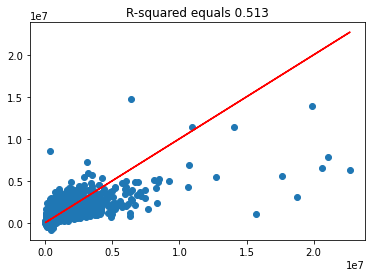

In [112]:
my_r2_plot(y_train, y_hat_final)

Notice that 0.513 is better than 0.478 in-sample correlation before the variable transformations (polynomial features and dummies)

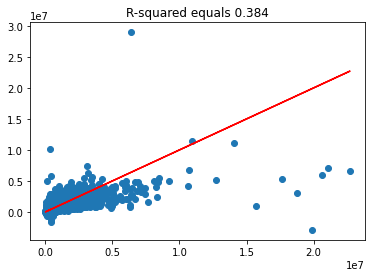

In [113]:
##producing cross-validated predictions
y_hat_cv_final = cvp(regr, final_X_train, y_train, cv=80) # doing cv=80 because LOO takes too long

my_r2_plot(y_train, y_hat_cv_final)

# the value of R-squared is 0.360, there is some correlation between the y_train but not strong
#therefore go back to previous steps and optimize paramaters

Also, note that the r-squared with cross-validated predictions is much lower than the usual in-sample r-squared (0.524 < 0.557). In other words, the performance of the model decreased drastically.

Notice also that the difference between the in-sample and cvp of our original dataset is smaller compared to the one with transform dataset  (0.485-0.489 = **0.06**) vs (0.513 - 0.383 =  **0.130**)

Therefore, if we transform are variables without penalizing (just the usual regression or alpha = 1, our model would be more inaccuarate compared to when there was no feature transformation.

In [114]:
#Step 6:
print(regr.coef_)

[-5.53584710e+02  3.13369509e-03  6.82549800e-03  1.00509732e+01
 -1.42100608e-03  2.42059779e-03  2.54696494e+02  7.33397429e+01
  1.38306446e+01  1.37769502e-03  3.86351835e+00  1.09573927e+00
  3.95769450e+02 -3.13786527e-01  3.11734311e+00  1.57033344e+00
  4.52069332e-01 -2.00088066e+01 -7.02347972e-01  8.34747317e-01
  2.21329550e+01 -1.37605275e-01  3.43699977e-01  5.48922958e-01
  1.59552600e-01 -1.42476002e-01 -2.40551080e+00 -4.82339296e-03
  8.33989198e+01 -3.87324672e+02 -1.84132080e-03 -5.33443529e-04
  7.83967721e-04 -8.81386583e+01  4.88007129e-01 -3.82957815e-01
  1.69682188e+00  4.81916011e-01 -3.29509623e+00  5.96245022e-01
  2.37113904e+00 -1.33353844e+00 -3.84167764e-01  1.99378518e+01
 -2.40610461e+00  2.11268134e-07  2.26804527e-06 -1.51596126e-07
 -1.37946113e+00  6.35679923e-07  7.73025901e-08 -3.96152279e-01
 -2.37435557e-07  4.35873233e+00  1.60303812e+00 -7.78288746e+02
 -1.55990003e+00  3.22658503e-01  2.01619849e+00  2.11373450e-02
 -9.38378699e-04 -9.19537

In [115]:
y_hat_test = regr.predict(final_X_test) #we produce predictions for our test dataset from our fitted model.

In [116]:
##Step 8:
#test_predictions_submit = pd.DataFrame({"lotid": test_original["lotid"], "parcelvalue": y_hat_test})
#test_predictions_submit.to_csv("test_predictions_submit.csv", index = False)

In [117]:
## we've seen that the score for this model perhaps could be very much improved so we use now lasso regression

### Standardization

In [118]:
#drop the intercept before standardization
final_X_train = final_X_train.iloc[: , 1:]

In [119]:
final_X_train.head()

,numbath,numbedroom,finishedarea,numfireplace,numfullbath,latitude,longitude,lotarea,roomnum,numbath^2,numbath numbedroom,numbath finishedarea,numbath numfireplace,numbath numfullbath,numbath latitude,numbath longitude,numbath lotarea,numbath roomnum,numbedroom^2,numbedroom finishedarea,numbedroom numfireplace,numbedroom numfullbath,numbedroom latitude,numbedroom longitude,numbedroom lotarea,numbedroom roomnum,finishedarea^2,finishedarea numfireplace,finishedarea numfullbath,finishedarea latitude,finishedarea longitude,finishedarea lotarea,finishedarea roomnum,numfireplace^2,numfireplace numfullbath,numfireplace latitude,numfireplace longitude,numfireplace lotarea,numfireplace roomnum,numfullbath^2,numfullbath latitude,numfullbath longitude,numfullbath lotarea,numfullbath roomnum,latitude^2,latitude longitude,latitude lotarea,latitude roomnum,longitude^2,longitude lotarea,longitude roomnum,lotarea^2,lotarea roomnum,roomnum^2,year,taxyear,heatingtype_6.0,heatingtype_7.0,heatingtype_18.0,heatingtype_20.0,citycode_12447.0,citycode_12520.0,citycode_16764.0,citycode_26964.0,citycode_30908.0,citycode_33612.0,citycode_37688.0,citycode_39308.0,citycode_42150.0,citycode_45457.0,citycode_46298.0,citycode_47019.0,citycode_47568.0,citycode_48424.0,citycode_51617.0,citycode_51861.0,citycode_52650.0,citycode_53571.0,citycode_54299.0,citycode_54311.0,citycode_54722.0,citycode_396054.0,countycode_6059,neighborhoodcode_13017.0,neighborhoodcode_13176.0,neighborhoodcode_19810.0,neighborhoodcode_26134.0,neighborhoodcode_27080.0,neighborhoodcode_27987.0,neighborhoodcode_30731.0,neighborhoodcode_31817.0,neighborhoodcode_33183.0,neighborhoodcode_34213.0,neighborhoodcode_37739.0,neighborhoodcode_37835.0,neighborhoodcode_40548.0,neighborhoodcode_41131.0,neighborhoodcode_41466.0,neighborhoodcode_47880.0,neighborhoodcode_47950.0,neighborhoodcode_48200.0,neighborhoodcode_48570.0,neighborhoodcode_51906.0,neighborhoodcode_54300.0,neighborhoodcode_113749.0,neighborhoodcode_113910.0,neighborhoodcode_118920.0,neighborhoodcode_268548.0,neighborhoodcode_268588.0,neighborhoodcode_274049.0,neighborhoodcode_275078.0,neighborhoodcode_275405.0,neighborhoodcode_other,regioncode_96006.0,regioncode_96023.0,regioncode_96027.0,regioncode_96030.0,regioncode_96049.0,regioncode_96120.0,regioncode_96247.0,regioncode_96294.0,regioncode_96321.0,regioncode_96325.0,regioncode_96336.0,regioncode_96339.0,regioncode_96341.0,regioncode_96342.0,regioncode_96346.0,regioncode_96349.0,regioncode_96352.0,regioncode_96354.0,regioncode_96355.0,regioncode_96356.0,regioncode_96361.0,regioncode_96364.0,regioncode_96368.0,regioncode_96369.0,regioncode_96370.0,regioncode_96373.0,regioncode_96374.0,regioncode_96377.0,regioncode_96378.0,regioncode_96379.0,regioncode_96387.0,regioncode_96389.0,regioncode_96401.0,regioncode_96410.0,regioncode_96411.0,regioncode_96412.0,regioncode_96415.0,regioncode_96424.0,regioncode_96426.0,regioncode_96449.0,regioncode_96452.0,regioncode_other
0,2.0,3.0,1757.0,0.0,2.0,34252019.0,-118467570.0,8612.0,0.0,4.0,6.0,3514.0,0.0,4.0,68504038.0,-236935140.0,17224.0,0.0,9.0,5271.0,0.0,6.0,102756057.0,-355402710.0,25836.0,0.0,3087049.0,0.0,3514.0,6.018080e+10,-2.081475e+11,15131284.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,4.0,68504038.0,-236935140.0,17224.0,0.0,1.173201e+15,-4.057753e+15,2.949784e+11,0.0,1.403457e+16,-1.020243e+12,-0.0,7.416654e+07,0.0,0.0,1952.0,2015.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,3.0,3.0,1663.0,0.0,3.0,34284508.0,-118493574.0,12102.0,0.0,9.0,9.0,4989.0,0.0,9.0,102853524.0,-355480722.0,36306.0,0.0,9.0,4989.0,0.0,9.0,102853524.0,-355480722.0,36306.0,0.0,2765569.0,0.0,4989.0,5.701514e+10,-1.970548e+11,2012

In [120]:
final_X_train.shape

(12560, 155)

In [121]:
final_X_test = final_X_test.iloc[: , 1:]

In [122]:
final_X_test.head()

,numbath,numbedroom,finishedarea,numfireplace,numfullbath,latitude,longitude,lotarea,roomnum,numbath^2,numbath numbedroom,numbath finishedarea,numbath numfireplace,numbath numfullbath,numbath latitude,numbath longitude,numbath lotarea,numbath roomnum,numbedroom^2,numbedroom finishedarea,numbedroom numfireplace,numbedroom numfullbath,numbedroom latitude,numbedroom longitude,numbedroom lotarea,numbedroom roomnum,finishedarea^2,finishedarea numfireplace,finishedarea numfullbath,finishedarea latitude,finishedarea longitude,finishedarea lotarea,finishedarea roomnum,numfireplace^2,numfireplace numfullbath,numfireplace latitude,numfireplace longitude,numfireplace lotarea,numfireplace roomnum,numfullbath^2,numfullbath latitude,numfullbath longitude,numfullbath lotarea,numfullbath roomnum,latitude^2,latitude longitude,latitude lotarea,latitude roomnum,longitude^2,longitude lotarea,longitude roomnum,lotarea^2,lotarea roomnum,roomnum^2,year,taxyear,heatingtype_6.0,heatingtype_7.0,heatingtype_18.0,heatingtype_20.0,citycode_12447.0,citycode_12520.0,citycode_16764.0,citycode_26964.0,citycode_30908.0,citycode_33612.0,citycode_37688.0,citycode_39308.0,citycode_42150.0,citycode_45457.0,citycode_46298.0,citycode_47019.0,citycode_47568.0,citycode_48424.0,citycode_51617.0,citycode_51861.0,citycode_52650.0,citycode_53571.0,citycode_54299.0,citycode_54311.0,citycode_54722.0,citycode_396054.0,countycode_6059,neighborhoodcode_13017.0,neighborhoodcode_13176.0,neighborhoodcode_19810.0,neighborhoodcode_26134.0,neighborhoodcode_27080.0,neighborhoodcode_27987.0,neighborhoodcode_30731.0,neighborhoodcode_31817.0,neighborhoodcode_33183.0,neighborhoodcode_34213.0,neighborhoodcode_37739.0,neighborhoodcode_37835.0,neighborhoodcode_40548.0,neighborhoodcode_41131.0,neighborhoodcode_41466.0,neighborhoodcode_47880.0,neighborhoodcode_47950.0,neighborhoodcode_48200.0,neighborhoodcode_48570.0,neighborhoodcode_51906.0,neighborhoodcode_54300.0,neighborhoodcode_113749.0,neighborhoodcode_113910.0,neighborhoodcode_118920.0,neighborhoodcode_268548.0,neighborhoodcode_268588.0,neighborhoodcode_274049.0,neighborhoodcode_275078.0,neighborhoodcode_275405.0,neighborhoodcode_other,regioncode_96006.0,regioncode_96023.0,regioncode_96027.0,regioncode_96030.0,regioncode_96049.0,regioncode_96120.0,regioncode_96247.0,regioncode_96294.0,regioncode_96321.0,regioncode_96325.0,regioncode_96336.0,regioncode_96339.0,regioncode_96341.0,regioncode_96342.0,regioncode_96346.0,regioncode_96349.0,regioncode_96352.0,regioncode_96354.0,regioncode_96355.0,regioncode_96356.0,regioncode_96361.0,regioncode_96364.0,regioncode_96368.0,regioncode_96369.0,regioncode_96370.0,regioncode_96373.0,regioncode_96374.0,regioncode_96377.0,regioncode_96378.0,regioncode_96379.0,regioncode_96387.0,regioncode_96389.0,regioncode_96401.0,regioncode_96410.0,regioncode_96411.0,regioncode_96412.0,regioncode_96415.0,regioncode_96424.0,regioncode_96426.0,regioncode_96449.0,regioncode_96452.0,regioncode_other
0,3.0,3.0,1618.0,0.0,3.0,34048500.0,-118438000.0,19423.0,0.0,9.0,9.0,4854.0,0.0,9.0,102145500.0,-355314000.0,58269.0,0.0,9.0,4854.0,0.0,9.0,102145500.0,-355314000.0,58269.0,0.0,2617924.0,0.0,4854.0,5.509047e+10,-1.916327e+11,31426414.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,9.0,102145500.0,-355314000.0,58269.0,0.0,1.159300e+15,-4.032636e+15,6.613240e+11,0.0,1.402756e+16,-2.300421e+12,-0.0,3.772529e+08,0.0,0.0,1975.0,2015.0,0.0,0.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
1,2.0,3.0,1817.0,0.0,2.0,34023816.0,-118429617.0,7625.0,0.0,4.0,6.0,3634.0,0.0,4.0,68047632.0,-236859234.0,15250.0,0.0,9.0,5451.0,0.0,6.0,102071448.0,-355288851.0,22875.0,0.0,3301489.0,0.0,3634.0,6.182127e+10,-2.151866e+11,13854625.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,4.0,68047632.0,-236859234.0,15250.0,0.0,1.157620e

In [123]:
final_X_test.shape

(2746, 155)

Next we use the standardization that Jack used in class. But this returns the error "Dataset may contain too large values. You may need to prescale your features." So I will use StandardScaler instead.

In [124]:
# standardisation of input is critical: We will use sklearn to do this

# generic lasso regression object
#from sklearn.preprocessing import scale as scl
#scaled_final_X_train = scl(final_X_train)

In [125]:
##standardization of train data before lasso

from sklearn import preprocessing
# Get column names first
names = final_X_train.columns
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
scaled_final_X_train = scaler.fit_transform(final_X_train)
scaled_final_X_train = pd.DataFrame(scaled_final_X_train, columns=names)

In [126]:
scaled_final_X_train.head()

,numbath,numbedroom,finishedarea,numfireplace,numfullbath,latitude,longitude,lotarea,roomnum,numbath^2,numbath numbedroom,numbath finishedarea,numbath numfireplace,numbath numfullbath,numbath latitude,numbath longitude,numbath lotarea,numbath roomnum,numbedroom^2,numbedroom finishedarea,numbedroom numfireplace,numbedroom numfullbath,numbedroom latitude,numbedroom longitude,numbedroom lotarea,numbedroom roomnum,finishedarea^2,finishedarea numfireplace,finishedarea numfullbath,finishedarea latitude,finishedarea longitude,finishedarea lotarea,finishedarea roomnum,numfireplace^2,numfireplace numfullbath,numfireplace latitude,numfireplace longitude,numfireplace lotarea,numfireplace roomnum,numfullbath^2,numfullbath latitude,numfullbath longitude,numfullbath lotarea,numfullbath roomnum,latitude^2,latitude longitude,latitude lotarea,latitude roomnum,longitude^2,longitude lotarea,longitude roomnum,lotarea^2,lotarea roomnum,roomnum^2,year,taxyear,heatingtype_6.0,heatingtype_7.0,heatingtype_18.0,heatingtype_20.0,citycode_12447.0,citycode_12520.0,citycode_16764.0,citycode_26964.0,citycode_30908.0,citycode_33612.0,citycode_37688.0,citycode_39308.0,citycode_42150.0,citycode_45457.0,citycode_46298.0,citycode_47019.0,citycode_47568.0,citycode_48424.0,citycode_51617.0,citycode_51861.0,citycode_52650.0,citycode_53571.0,citycode_54299.0,citycode_54311.0,citycode_54722.0,citycode_396054.0,countycode_6059,neighborhoodcode_13017.0,neighborhoodcode_13176.0,neighborhoodcode_19810.0,neighborhoodcode_26134.0,neighborhoodcode_27080.0,neighborhoodcode_27987.0,neighborhoodcode_30731.0,neighborhoodcode_31817.0,neighborhoodcode_33183.0,neighborhoodcode_34213.0,neighborhoodcode_37739.0,neighborhoodcode_37835.0,neighborhoodcode_40548.0,neighborhoodcode_41131.0,neighborhoodcode_41466.0,neighborhoodcode_47880.0,neighborhoodcode_47950.0,neighborhoodcode_48200.0,neighborhoodcode_48570.0,neighborhoodcode_51906.0,neighborhoodcode_54300.0,neighborhoodcode_113749.0,neighborhoodcode_113910.0,neighborhoodcode_118920.0,neighborhoodcode_268548.0,neighborhoodcode_268588.0,neighborhoodcode_274049.0,neighborhoodcode_275078.0,neighborhoodcode_275405.0,neighborhoodcode_other,regioncode_96006.0,regioncode_96023.0,regioncode_96027.0,regioncode_96030.0,regioncode_96049.0,regioncode_96120.0,regioncode_96247.0,regioncode_96294.0,regioncode_96321.0,regioncode_96325.0,regioncode_96336.0,regioncode_96339.0,regioncode_96341.0,regioncode_96342.0,regioncode_96346.0,regioncode_96349.0,regioncode_96352.0,regioncode_96354.0,regioncode_96355.0,regioncode_96356.0,regioncode_96361.0,regioncode_96364.0,regioncode_96368.0,regioncode_96369.0,regioncode_96370.0,regioncode_96373.0,regioncode_96374.0,regioncode_96377.0,regioncode_96378.0,regioncode_96379.0,regioncode_96387.0,regioncode_96389.0,regioncode_96401.0,regioncode_96410.0,regioncode_96411.0,regioncode_96412.0,regioncode_96415.0,regioncode_96424.0,regioncode_96426.0,regioncode_96449.0,regioncode_96452.0,regioncode_other
0,-0.570671,-0.092612,-0.212365,-0.069444,-0.568978,0.637887,-0.295995,-0.358278,-0.093778,-0.476654,-0.423066,-0.294026,-0.062058,-0.476224,-0.565907,0.569820,-0.343453,-0.086777,-0.249071,-0.253109,-0.066495,-0.422339,-0.085689,0.091610,-0.317193,-0.087686,-0.165557,-0.058849,-0.293743,-0.208411,0.211811,-0.289410,-0.083183,-0.053542,-0.061195,-0.069436,0.069453,-0.059824,-0.064567,-0.475873,-0.564220,0.568129,-0.343431,-0.085994,0.637484,-0.614372,-0.357992,-0.093767,0.295592,0.358323,0.093783,-0.089908,-0.077341,-0.087342,-0.881490,-0.643750,-0.089134,-0.266005,-0.008923,-0.026778,0.662357,-0.029607,-0.074863,-0.075399,-0.0859,-0.029607,-0.059292,-0.079559,-0.029607,-0.215216,-0.225934,-0.194317,-0.041889,-0.035714,-0.064477,-0.061938,-0.041889,-0.008923,-0.083999,-0.327851,-0.12024,-0.055088,-0.096128,-0.116435,-0.094855,-0.106935,-0.1304,-0.184852,-0.143667,-0.122937,-0.149616,-0.186915,-0.134752,-0.177110,-0.146811,-0.150172,-0.119899,-0.116435,-0.141341,-0.173004,-0.17422,-0.236068,-0.197603,-0.096128,-0.090931,-0.1

In [127]:
scaled_final_X_train.shape

(12560, 155)

In [128]:
##standardization of test data before lasso

# Get column names first
names = final_X_test.columns

# Fit your data on the scaler object
#We do not need to fit the objects again. 
#For sc, we want to keep the method we used to fit X_train_poly. 
#This means that the test data will not be perfectly standardised, and that is fine. 
#So instead of fit_transform, we use transform.
scaled_final_X_test = scaler.transform(final_X_test)
scaled_final_X_test = pd.DataFrame(scaled_final_X_test, columns=names)

In [129]:
scaled_final_X_test.shape

(2746, 155)

In [130]:
scaled_final_X_test.sample(10)

,numbath,numbedroom,finishedarea,numfireplace,numfullbath,latitude,longitude,lotarea,roomnum,numbath^2,numbath numbedroom,numbath finishedarea,numbath numfireplace,numbath numfullbath,numbath latitude,numbath longitude,numbath lotarea,numbath roomnum,numbedroom^2,numbedroom finishedarea,numbedroom numfireplace,numbedroom numfullbath,numbedroom latitude,numbedroom longitude,numbedroom lotarea,numbedroom roomnum,finishedarea^2,finishedarea numfireplace,finishedarea numfullbath,finishedarea latitude,finishedarea longitude,finishedarea lotarea,finishedarea roomnum,numfireplace^2,numfireplace numfullbath,numfireplace latitude,numfireplace longitude,numfireplace lotarea,numfireplace roomnum,numfullbath^2,numfullbath latitude,numfullbath longitude,numfullbath lotarea,numfullbath roomnum,latitude^2,latitude longitude,latitude lotarea,latitude roomnum,longitude^2,longitude lotarea,longitude roomnum,lotarea^2,lotarea roomnum,roomnum^2,year,taxyear,heatingtype_6.0,heatingtype_7.0,heatingtype_18.0,heatingtype_20.0,citycode_12447.0,citycode_12520.0,citycode_16764.0,citycode_26964.0,citycode_30908.0,citycode_33612.0,citycode_37688.0,citycode_39308.0,citycode_42150.0,citycode_45457.0,citycode_46298.0,citycode_47019.0,citycode_47568.0,citycode_48424.0,citycode_51617.0,citycode_51861.0,citycode_52650.0,citycode_53571.0,citycode_54299.0,citycode_54311.0,citycode_54722.0,citycode_396054.0,countycode_6059,neighborhoodcode_13017.0,neighborhoodcode_13176.0,neighborhoodcode_19810.0,neighborhoodcode_26134.0,neighborhoodcode_27080.0,neighborhoodcode_27987.0,neighborhoodcode_30731.0,neighborhoodcode_31817.0,neighborhoodcode_33183.0,neighborhoodcode_34213.0,neighborhoodcode_37739.0,neighborhoodcode_37835.0,neighborhoodcode_40548.0,neighborhoodcode_41131.0,neighborhoodcode_41466.0,neighborhoodcode_47880.0,neighborhoodcode_47950.0,neighborhoodcode_48200.0,neighborhoodcode_48570.0,neighborhoodcode_51906.0,neighborhoodcode_54300.0,neighborhoodcode_113749.0,neighborhoodcode_113910.0,neighborhoodcode_118920.0,neighborhoodcode_268548.0,neighborhoodcode_268588.0,neighborhoodcode_274049.0,neighborhoodcode_275078.0,neighborhoodcode_275405.0,neighborhoodcode_other,regioncode_96006.0,regioncode_96023.0,regioncode_96027.0,regioncode_96030.0,regioncode_96049.0,regioncode_96120.0,regioncode_96247.0,regioncode_96294.0,regioncode_96321.0,regioncode_96325.0,regioncode_96336.0,regioncode_96339.0,regioncode_96341.0,regioncode_96342.0,regioncode_96346.0,regioncode_96349.0,regioncode_96352.0,regioncode_96354.0,regioncode_96355.0,regioncode_96356.0,regioncode_96361.0,regioncode_96364.0,regioncode_96368.0,regioncode_96369.0,regioncode_96370.0,regioncode_96373.0,regioncode_96374.0,regioncode_96377.0,regioncode_96378.0,regioncode_96379.0,regioncode_96387.0,regioncode_96389.0,regioncode_96401.0,regioncode_96410.0,regioncode_96411.0,regioncode_96412.0,regioncode_96415.0,regioncode_96424.0,regioncode_96426.0,regioncode_96449.0,regioncode_96452.0,regioncode_other
70,-0.570671,-0.092612,0.145741,-0.069444,-0.568978,0.097956,1.652676,-0.324387,-0.093778,-0.476654,-0.423066,-0.205650,-0.062058,-0.476224,-0.570230,0.575023,-0.317390,-0.086777,-0.249071,-0.079857,-0.066495,-0.422339,-0.091995,0.099210,-0.279650,-0.087686,-0.049271,-0.058849,-0.205371,0.146614,-0.141181,-0.236714,-0.083183,-0.053542,-0.061195,-0.069436,0.069453,-0.059824,-0.064567,-0.475873,-0.568540,0.573328,-0.317368,-0.085994,0.095896,0.379246,-0.324253,-0.093767,-1.652919,0.324692,0.093783,-0.089495,-0.077341,-0.087342,-2.021045,-0.643750,-0.089134,-0.266005,-0.008923,-0.026778,-1.509759,-0.029607,-0.074863,-0.075399,-0.0859,-0.029607,-0.059292,-0.079559,-0.029607,-0.215216,-0.225934,5.146221,-0.041889,-0.035714,-0.064477,-0.061938,-0.041889,-0.008923,-0.083999,-0.327851,-0.12024,-0.055088,-0.096128,-0.116435,-0.094855,-0.106935,-0.1304,-0.184852,-0.143667,-0.122937,-0.149616,-0.186915,-0.134752,-0.177110,-0.146811,-0.150172,-0.119899,-0.116435,-0.141341,-0.173004,-0.17422,-0.236068,-0.197603,-0.096128,-0.090931,-0.11

I notice that the dummy columns are not with 0 and 1's anymore but they still contain binary values, so that's okay.

In [131]:
print(type(scaled_final_X_train))
print(type(scaled_final_X_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [132]:
#I change the type/class to a numpy array because that would be faster
scaled_final_X_train_np = np.array(scaled_final_X_train)
scaled_final_X_test_np = np.array(scaled_final_X_test)
y_train_np = np.array(y_train)

In [133]:
def print_shape(a):
    for i in a:
        print(i.shape)

In [134]:
scaled = [scaled_final_X_train_np, scaled_final_X_test_np]
print_shape(scaled)

(12560, 155)
(2746, 155)


### Building the third model

Note that all the proceeding models use Lasso, but with different ways how to find and set the hyperparameter alpha.

**Lasso using transformed features**

I'll use LassoLarsIC (whose results are based on AIC/BIC criteria) for faster computation.

*Lasso using LassoLarsIC, using the Akaike Information Criterion (AIC)*

In [135]:
from sklearn import linear_model

In [136]:
regr_lasso = linear_model.LassoLarsIC(criterion="aic", normalize=False, max_iter = 100000)
regr_lasso.fit(scaled_final_X_train_np, y_train_np)
alpha_regr_lasso = regr_lasso.alpha_
print(alpha_regr_lasso)

1.5736681638814658


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:642: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 342 iterations, alpha=4.950e-07, previous alpha=4.127e-07, with an active set of 151 regressors.
  warnings.warn('Early stopping the lars path, as the residues '


Now we do it with a graph to better visualize how the model was selected through the AIC. We also plot it agains BIC.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:642: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 342 iterations, alpha=4.950e-07, previous alpha=4.127e-07, with an active set of 151 regressors.
  warnings.warn('Early stopping the lars path, as the residues '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:642: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 342 iterations, alpha=4.950e-07, previous alpha=4.127e-07, with an active set of 151 regressors.
  warnings.warn('Early stopping the lars path, as the residues '


Text(0.5, 1.0, 'Information-criterion for model selection (training time 0.267s)')

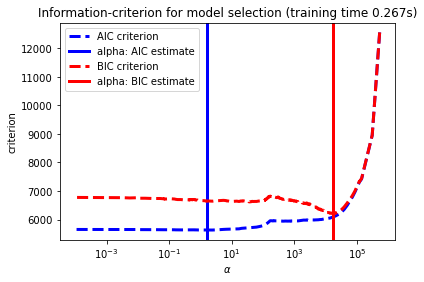

In [137]:
import time

# This is to avoid division by zero while doing np.log10
EPSILON = 1e-4

# LassoLarsIC: least angle regression with BIC/AIC criterion

model_bic = linear_model.LassoLarsIC(criterion="bic", normalize=False)
t1 = time.time()
model_bic.fit(scaled_final_X_train_np, y_train_np)
t_bic = time.time() - t1
alpha_bic_ = model_bic.alpha_

model_aic = linear_model.LassoLarsIC(criterion="aic", normalize=False)
model_aic.fit(scaled_final_X_train_np, y_train_np)
alpha_aic_ = model_aic.alpha_


def plot_ic_criterion(model, name, color):
    criterion_ = model.criterion_
    plt.semilogx(
        model.alphas_ + EPSILON,
        criterion_,
        "--",
        color=color,
        linewidth=3,
        label="%s criterion" % name,
    )
    plt.axvline(
        model.alpha_ + EPSILON,
        color=color,
        linewidth=3,
        label="alpha: %s estimate" % name,
    )
    plt.xlabel(r"$\alpha$")
    plt.ylabel("criterion")


plt.figure()
plot_ic_criterion(model_aic, "AIC", "b")
plot_ic_criterion(model_bic, "BIC", "r")
plt.legend()
plt.title("Information-criterion for model selection (training time %.3fs)" % t_bic)

In [138]:
print(alpha_bic_)
print(alpha_aic_)

17081.51389759445
1.5736681638814658


In [139]:
regr_lasso = linear_model.LassoLarsIC(criterion='aic', fit_intercept=True, max_iter=100000, normalize=False) #we've dropped the constant before scaling so we will fit the intercept
regr_lasso.fit(scaled_final_X_train,y_train)

#352 iterations, alpha=1.441e-06, previous alpha=1.333e-06, with an active set of 151 regressors.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:642: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 342 iterations, alpha=4.950e-07, previous alpha=4.127e-07, with an active set of 151 regressors.
  warnings.warn('Early stopping the lars path, as the residues '


LassoLarsIC(max_iter=100000, normalize=False)

In [140]:
print(regr_lasso.alpha_)

1.5736681638814658


In [141]:
#Step 6
print(regr_lasso.coef_)

[ 2.71505433e+07  2.25900951e+07 -6.80276511e+07  0.00000000e+00
  6.12316312e+05  1.19985382e+07 -9.24660815e+04  1.04766277e+06
  0.00000000e+00  4.78343954e+05  0.00000000e+00  0.00000000e+00
 -1.10454549e+04  0.00000000e+00  0.00000000e+00  2.79629950e+07
  0.00000000e+00  1.17099959e+05 -2.15825403e+05  3.66778397e+05
 -4.94424005e+03 -3.03659768e+04  1.65736254e+07  3.91039391e+07
 -6.91540199e+04 -3.71005521e+03  8.51508280e+04 -1.09547626e+04
 -4.16977048e+05 -5.23666572e+07 -1.20730604e+08  2.00920810e+05
 -2.10310797e+04  1.77351447e+03  0.00000000e+00  0.00000000e+00
  1.37577903e+04 -3.38490370e+03  4.42792833e+04  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -3.60798899e+04 -1.08587709e+05
 -1.19293841e+07  0.00000000e+00 -1.08288838e+06  7.26068324e+05
  0.00000000e+00  0.00000000e+00  6.43934039e+05 -5.43125631e+04
  1.86223754e+04 -6.18392203e+04 -9.41286819e+03  1.73433564e+04
  9.57368772e+03  2.45470492e+03 -2.40981636e+02  2.93734612e+03
 -1.19928800e+04 -1.20807

We observe that some coefficients are zeroed out. This means that our model done feature selection and parameter tuning at the same time. Let's check how many features have been retained (and zeroed out using the code below.

In [142]:
print("Total coefficiets:", len(regr_lasso.coef_))
print("Non-zero coefficiets:", np.count_nonzero(regr_lasso.coef_))

Total coefficiets: 155
Non-zero coefficiets: 136


There are now 136 non-zero coefficients. This means that 18 features have been zeroed out by our model.

Which features have been zeroed out by lasso? Examples are 'numfireplace', 'roomnum', 'numbathnumbedroom', etc.

In [143]:
dict_zip(final_X_train.columns, regr_lasso.coef_)

{'numbath': 27150543.294606466,
 'numbedroom': 22590095.11782903,
 'finishedarea': -68027651.11998206,
 'numfireplace': 0.0,
 'numfullbath': 612316.3122782654,
 'latitude': 11998538.211691532,
 'longitude': -92466.08153020147,
 'lotarea': 1047662.7673148959,
 'roomnum': 0.0,
 'numbath^2': 478343.9540588299,
 'numbath numbedroom': 0.0,
 'numbath finishedarea': 0.0,
 'numbath numfireplace': -11045.454851504534,
 'numbath numfullbath': 0.0,
 'numbath latitude': 0.0,
 'numbath longitude': 27962994.96803735,
 'numbath lotarea': 0.0,
 'numbath roomnum': 117099.95884224486,
 'numbedroom^2': -215825.4025376802,
 'numbedroom finishedarea': 366778.39700192446,
 'numbedroom numfireplace': -4944.240054601111,
 'numbedroom numfullbath': -30365.976798243293,
 'numbedroom latitude': 16573625.365312262,
 'numbedroom longitude': 39103939.10929425,
 'numbedroom lotarea': -69154.01993835841,
 'numbedroom roomnum': -3710.055206346466,
 'finishedarea^2': 85150.82801887183,
 'finishedarea numfireplace': -10

In [144]:
y_hat_train = regr_lasso.predict(scaled_final_X_train) #we produce predictions from our fitted model based on train data

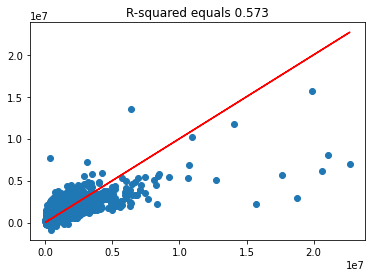

In [145]:
#IN-SAMPLE
my_r2_plot(y_train, y_hat_train)

#we observe that this model has higer correlation / higher explanatory power than the OLS ( 0.573 vs. 0.485), 
#so this a good sign

In [146]:
##producing cross-validated predictions
y_hat_cv = cvp(regr_lasso, scaled_final_X_train, y_train, cv=40) # doing cv=40 because LOO takes too long

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:642: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 372 iterations, alpha=3.810e-07, previous alpha=2.065e-07, with an active set of 151 regressors.
  warnings.warn('Early stopping the lars path, as the residues '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:642: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 350 iterations, alpha=8.640e-07, previous alpha=5.727e-07, with an active set of 151 regressors.
  warnings.warn('Early stopping the lars path, as the residues '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:642: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 366 iterat

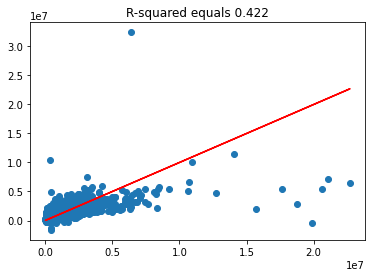

In [147]:
my_r2_plot(y_train, y_hat_cv)


#the cross-validated predictions worse, however (0.480 vs 0.421). The reduction in score is also higher.
#but still, our results aren't that bad!!
#however, when I submitted my predictions to Kaggle, it returned a really high NMSE

In [148]:
y_hat_test = regr_lasso.predict(scaled_final_X_test_np) 
#the submitted predictions to kaggle returned a high negative mean square error: 841082.34786
#why? this is my worst performing model so far

**Just some exploration**

Now checking again using just OLS, but now with the scaled data. This is because I'm wondering why my Lasso perfomed worse than the usual Linear Regression.

In [149]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression(fit_intercept=True)
regr.fit(scaled_final_X_train_np,y_train_np)
regr.score(scaled_final_X_train_np,y_train_np)

#the result is quite good

0.5740387798446189

In [150]:
##producing cross-validated predictions
y_hat_cv = cvp(regr, scaled_final_X_train, y_train, cv=40) # doing cv=40 because LOO takes too long

regr.score(scaled_final_X_train_np,y_hat_cv)

#Why is the usual regression doing really bad using scaled data under cross-validated predictions?

-7.962417367246566e-05

### Building the fourth model

Lasso with some random alpha I've set. Our previous model used alpha=1.57. I'll use a smaller alpha this time.

In [ ]:
regr_lasso = linear_model.Lasso(random_state = 0, max_iter=500000, alpha=0.001, tol=0.1, fit_intercept=True) 
#random state is setting seed for reproducible results

In [ ]:
regr_lasso.fit(scaled_final_X_train_np, y_train_np)

In [ ]:
#Step 6
print(regr_lasso.coef_)

In [ ]:
print("Total coefficiets:", len(regr_lasso.coef_))
print("Non-zero coefficiets:", np.count_nonzero(regr_lasso.coef_))
#none of the coefficients have been zeroed out

In [ ]:
## IN-SAMPLE ##
y_hat = regr_lasso.predict(scaled_final_X_train)
#print(y_hat.shape)

my_r2_plot(y_train, y_hat)

In [ ]:
##producing cross-validated predictions
y_hat_cv = cvp(regr_lasso, scaled_final_X_train_np, y_train_np, cv=40) # doing cv=40 because LOO takes too long

print(r2_score(y_train,y_hat_cv)) #equals to 0.42229123280112824
print(regr_lasso.score(scaled_final_X_train_np,y_hat_cv)) # equals to #equals to 0.977778279489165

In [ ]:
#now we try on test dataset
y_hat_test = regr_lasso.predict(scaled_final_X_test)

#kaggle returned an RMSE of 841082.34791

### Building the fifth model

**GridSearchCV**

Lasso again, with grid search of alphas this time. We include 1.57 and 0.001, the alphas we've used before.

I've tried many times, but oftentimes, the model does not converge, unless I set tol=1. However, upon checking the coefficients, I was not able to zero out anything. So I will change tol to a smaller value.However, I've run the search for 6 hours and it still has not finished.

In [151]:
from sklearn.model_selection import cross_val_score
lasso = linear_model.Lasso(random_state = 0, max_iter=5000000, tol=1)


alphas = np.array([0.000007, 0.00008,0.00012,0.0005, 0.001,1.5736681638814658]) #we include the alpha we got from the AIC
alphas_long = np.array([0.000007, 0.00002, 0.00005,0.00008,0.00012,0.0002,0.0003,0.0005,0.0006,0.002])

tuned_parameters = [{'alpha': alphas}] ## dictionary

In [152]:
# create a scorer to evaluate performance

from sklearn.metrics import mean_squared_error, make_scorer 

## ALWAYS read carefully documentation. copying here from make_scorer
## greater_is_better : boolean, default=True
# "Whether score_func is a score function (default), meaning high is 
# good, or a loss function, meaning low is good. 
# In the latter case, the scorer object will sign-flip 
# the outcome of the score_func.
mse = make_scorer(mean_squared_error,greater_is_better=False)

In [153]:
from sklearn.model_selection import GridSearchCV

n_folds = 10 

clf = GridSearchCV(lasso, tuned_parameters, scoring = mse, 
                   cv=n_folds, refit=False)


In [154]:
clf.fit(scaled_final_X_train, y_train)


scores = clf.cv_results_['mean_test_score']
scores_std = clf.cv_results_['std_test_score']
std_error = scores_std / np.sqrt(n_folds)

In [155]:
# Extract best param
clf.best_params_

#the search identified the smallest alpha from the leastas the best one

{'alpha': 7e-06}

In [156]:
from sklearn.linear_model import Lasso
regr_lasso = Lasso(alpha=0.000007, random_state = 0, max_iter=3000000, tol=1)

In [157]:
regr_lasso.fit(scaled_final_X_train_np,y_train_np)

Lasso(alpha=7e-06, max_iter=3000000, random_state=0, tol=1)

In [158]:
#Step 6
print(regr_lasso.coef_)

[ 4.14974313e+05 -1.83197012e+04  2.15945416e+05 -4.31278216e+03
 -1.64747713e+05 -8.82367121e+04 -2.50624785e+04  2.06825568e+03
 -2.02754057e+04  7.09718329e+04 -3.06149600e+04  8.66973407e+04
  4.75164172e+02 -5.23341206e+04 -5.65588520e+04 -7.83236274e+02
  6.59319029e+03 -3.93909637e+03 -2.56865308e+03  9.21484315e+04
  4.25236529e+03 -5.56751932e+04 -3.98761244e+04 -4.32936142e+02
 -5.91435179e+03 -1.83422399e+02  9.16628462e+04 -5.62329499e+02
 -1.02336040e+04  4.01103299e+04 -8.24647124e+02  2.44778217e+04
 -4.37829059e+02  6.66710924e+02 -1.13539844e+02  4.57301242e+03
  9.31923908e-01 -1.33372304e+03 -6.32776814e+02 -4.82162307e+04
 -2.84798879e+04 -7.14075446e+02 -1.76534591e+04 -4.36820472e+03
 -2.15172656e+03 -1.60763648e+03 -6.77967375e+03  1.63416310e+03
  5.00567987e+03  1.51642864e+02 -1.48573482e+03 -7.13913859e+03
  2.58695175e+03 -3.17748587e+03 -2.04793860e+04  1.31167984e+04
  1.03834707e+03  8.81908161e+03  1.30485097e+02  2.52413645e+03
  1.42457369e+04  1.45292

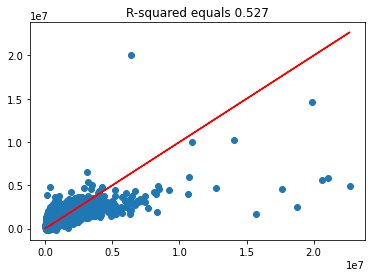

In [159]:
## IN-SAMPLE ##
y_hat = regr_lasso.predict(scaled_final_X_train_np)
#print(y_hat.shape)

my_r2_plot(y_train, y_hat)

In [160]:
y_hat_test = regr_lasso.predict(scaled_final_X_test_np)

#RMSE from Kaggle = 647076.20247

**Some more exploration using Cross Validation**

We compare cross validation scores from Ridge and Lasso

In [161]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge, Lasso

for Model in [Ridge, Lasso]:
    model = Model()
    print('%s: %s' % (Model.__name__,
                      cross_val_score(model, scaled_final_X_train_np, y_train_np).mean()))

Ridge: 0.42327639223114505


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1528187544050885.8, tolerance: 675232456375.7844
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1596909223446621.8, tolerance: 714250267288.3132
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1584612554091825.2, tolerance: 702122829233.6042
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWar

Lasso: 0.41875905460530893


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1439063260146388.5, tolerance: 643076525025.772
  model = cd_fast.enet_coordinate_descent(


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1358634282728404.8, tolerance: 599971486210.1289
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1257405046328063.5, tolerance: 578862194759.6841
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1060893116331533.5, tolerance: 484037916032.47424
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWa

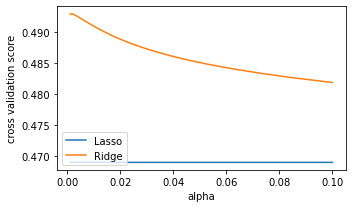

In [162]:
alphas = np.logspace(-3, -1, 30)

plt.figure(figsize=(5, 3))

for Model in [Lasso, Ridge]:
    scores = [cross_val_score(Model(alpha), scaled_final_X_train_np, y_train_np, cv=3).mean()
            for alpha in alphas]
    plt.plot(alphas, scores, label=Model.__name__)

plt.legend(loc='lower left')
plt.xlabel('alpha')
plt.ylabel('cross validation score')
plt.tight_layout()
plt.show()

From the graph above, I conclude that the optimal alpha is something very small (close to 0). This is in line with the results of our GridSeachCV but not with LassoLarsIC using AIC.

### Building sixth model

Let's try fitting the model using Ridge just because there's something different in the previou graph.

In [163]:
from sklearn.linear_model import Ridge

clf = Ridge(alpha=0.0000001)
clf.fit(scaled_final_X_train_np, y_train_np)

Ridge(alpha=1e-07)

In [164]:
y_hat_ridge = clf.predict(scaled_final_X_train_np)

In [165]:
print(r2_score(y_train_np, y_hat_ridge))

0.5740382778110698


In [166]:
y_hat_ridge_cv = cvp(clf, scaled_final_X_train_np, y_train_np, cv=80)

In [167]:
print(r2_score(y_train_np, y_hat_ridge_cv))

0.43038420424463475


In [168]:
y_hat_ridge_test = clf.predict(scaled_final_X_test_np)
#really bad RMSE: 918631.56856

***Other codes that I tried to do but took too long***

In [ ]:
#GridSearcCV is taking too long, better to use RandomizedGridSearchInstead

#small
#cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)
#lasso_alphas = np.array([0.000007, 0.00005,0.00012, 0.00025,0.0005,0.002])
#lasso = Lasso(random_state=0,max_iter=100000)
#grid = dict()
#grid['alpha'] = lasso_alphas
#gscv = GridSearchCV( \
    #lasso, grid, scoring='neg_root_mean_squared_error', \
    #cv=50, n_jobs=-1)
#results = gscv.fit(scaled_final_X_train_df, y_train)

#print('MAE: %.5f' % results.best_score_)
#print('Config: %s' % results.best_params_)

In [ ]:
#big
#cv = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)
#lasso_alphas = np.array([0.000007, 0.00002, 0.00004, 0.00005,0.00008,0.0001,0.00012, 0.00015,0.0002,0.00025,0.0003,0.0004,0.0005,0.0006,0.0007,0.002])
#lasso = Lasso(random_state=0, max_iter = 1000000, tol=0.01)
#grid = dict()
#grid['alpha'] = lasso_alphas
#gscv = GridSearchCV( \
    #lasso, grid, scoring='neg_root_mean_squared_error', \
    #cv=50, n_jobs=-1)
#results = gscv.fit(scaled_final_X_train_new_df, y_train)

#print('MAE: %.5f' % results.best_score_)
#print('Config: %s' % results.best_params_)

In [ ]:
#I've tried doing the lasso using the following parameters but it returned a worse fit that if only I did a simple linear regression
#further, there are some values that are negative
#let's try to force the coefficients to be positive

In [ ]:
#lasso
#from sklearn.linear_model import Lasso
#alpha is what was lambda in our notation
#i'll change the max_iter recommended by the class notes to a smaller one since 1000000 it's taking too long 
#for my computer to fit the data
#regr_lasso = Lasso(alpha=0.0001, fit_intercept=False,warm_start=True,max_iter=100000)
#regr_lasso = Lasso(alpha=50, fit_intercept=False,warm_start=False,max_iter=50000, tol=0.1)
#regr_lasso = Lasso(alpha=5, fit_intercept=False,warm_start=False,max_iter=100000, tol=0.1)
#regr_lasso = Lasso(alpha=1, fit_intercept=False,warm_start=True,max_iter=10000)

regr_lasso = Lasso(alpha=1, fit_intercept=False, warm_start=True,max_iter=1000000, tol=0.1, positive=True)

In [ ]:
#regr_lasso.fit(scaled_final_X_train_df,y_train)

In [ ]:
#print(regr_lasso.coef_)

In [ ]:
# Step 6: Report variable impact

# Report of the coefficients every after model fit


In [ ]:
# Step 7: Prepare code to run and check performance of you model using a new input data with same exact format

#other step 7's are above (after the in-sample and cross validation predict)
y_hat_test = regr_lasso.predict(scaled_final_X_test_new_df) #we produce predictions from our fitted model based on test data

### Kaggle Predictions Submissions

Once you have produced testset predictions you can submit these to <i> kaggle </i> in order to see how your model performs. 

The following code provides an example of generating a <i> .csv </i> file to submit to kaggle
1) create a pandas dataframe with two columns, one with the test set "lotid"'s and the other with your predicted "parcelvalue" for that observation

2) use the <i> .to_csv </i> pandas method to create a csv file. The <i> index = False </i> is important to ensure the <i> .csv </i> is in the format kaggle expects 

In [ ]:
# Step 8: Produce .csv for kaggle testing 
test_predictions_submit = pd.DataFrame({"lotid": test_original["lotid"], "parcelvalue": y_hat_test})
test_predictions_submit.to_csv("test_predictions_submit.csv", index = False)